#**TOPIC - Could you determine the survey questions that are most predictive of a movie's IMDB rating?**

**Survey Questions**: These are responses from survey-takers and represent their opinions or feedback about various aspects of a movie.

**Data Attributes**: These are other attributes related to the movie itself, such as its name, release year, IMDb link, genres, notable stars, scores for maturity rating attributes, runtime, budget, user ID, maturity rating, release type, and the number of IMDB reviews.

To correlate survey question variables with IMDb ratings, I  have performed statistical analyses to measure the relationship between these variables. Here's a general outline of how I approached it:

**Data Preprocessing:**

1- Cleaning and preprocessing data, including handling missing values and converting data types if necessary.

2- Ensuring that survey question responses are in numeric or categorical format for analysis.

3- Selecting the survey question variables that wanted to correlate with IMDb ratings.

**Correlation Analysis:**

1- Using statistical methods such as Pearson correlation (for numeric variables) or chi-squared tests (for categorical variables) to determine the relationship between each survey question variable and IMDb ratings.

2- Calculating correlation coefficients and p-values to assess the strength and significance of these relationships.


**Visualization:**

Creating visualizations like scatter plots, bar charts, or heatmaps to visualize the correlations between survey question variables and IMDb ratings.

**Hypothesis Testing:**

Depending on research goals,tested specific hypotheses about the impact of certain survey question variables on IMDb ratings.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

data = pd.read_csv('/content/movie_survey_data_matched_to_movie_characteristics.csv')
df=data



In [2]:
#Printing all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 73 columns):
 #   Column                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                            --------------  -----  
 0   What is this movie's name? (Use exact spelling)                                                                                                                   301 non-null    object 
 1   What year was this movie released?                                                                                                                                301 non-null    int64  
 2   How long is this movie?                                                                                                       

In [3]:
# Check for null values
null_mask = data.isnull()
null_count = df.isnull().sum()
print(null_count)

What is this movie's name? (Use exact spelling)                         0
What year was this movie released?                                      0
How long is this movie?                                                 0
What is the plot of this movie? (5 sentences)                           0
Had you watched this movie previously, or was this your first time?     0
                                                                       ..
release_type                                                           51
num_reviews_written                                                     0
review_rating_mean                                                      0
imdb_rating_updated                                                     0
user_id                                                                 0
Length: 73, dtype: int64


In [4]:
#To fill rows and columns with null values for numeric data:
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill missing values in a categorical column with the most frequent category
df['release_type'].fillna(df['release_type'].mode()[0], inplace=True)
df["What's the most important attribute of this movie that this survey missed?"].fillna(df["What's the most important attribute of this movie that this survey missed?"].mode()[0], inplace=True)
df["Which of the following would you characterize as among the film's intended artistic objectives?"].fillna(df["Which of the following would you characterize as among the film's intended artistic objectives?"].mode()[0], inplace=True)
df['Check all attributes that apply to this movie:'].fillna(df['Check all attributes that apply to this movie:'].mode()[0], inplace=True)
df["What characteristics apply to this movie's dialogue?"].fillna(df["What characteristics apply to this movie's dialogue?"].mode()[0], inplace=True)
df["Which of the following describes the movie's climax? Check all that apply"].fillna(df["Which of the following describes the movie's climax? Check all that apply"].mode()[0], inplace=True)
df['What were the qualities of the beginning? Check all that apply'].fillna(df['What were the qualities of the beginning? Check all that apply'].mode()[0], inplace=True)
df['Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)'].fillna(df['Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)'].mode()[0], inplace=True)
df['What were the characteristics of the antagonist? '].fillna(df['What were the characteristics of the antagonist? '].mode()[0], inplace=True)
df['What were the characteristics of the protagonist?'].fillna(df['What were the characteristics of the protagonist?'].mode()[0], inplace=True)
df['release_type'].fillna(df['release_type'].mode()[0], inplace=True)





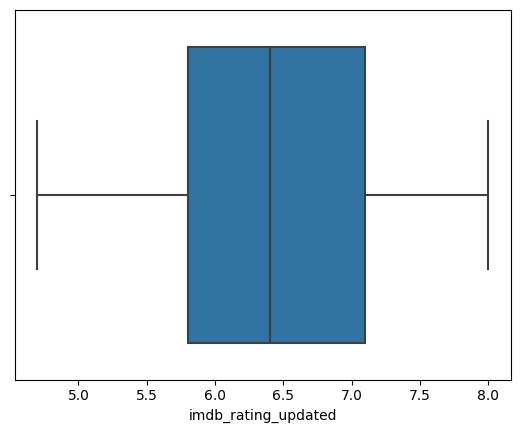

In [5]:
# Box plot to visualize IMDB_Rating
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=data['imdb_rating_updated'])
plt.show()


In [6]:
# Defining target variables
target_variables = ['imdb_rating_updated', 'metascore', 'gross_usa']

In [7]:
#Z-score for Outlier
from scipy import stats
z_scores = stats.zscore(data['imdb_rating_updated'])
outliers = (z_scores > 2) | (z_scores < -2)
outlier_data = data[outliers]



In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = "imdb_rating_updated ~ metascore"
groups = df["user_id"]
model = sm.MixedLM.from_formula(formula, groups=groups, data=df)
result = model.fit()
print(result.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: imdb_rating_updated
No. Observations: 301     Method:             REML               
No. Groups:       34      Scale:              0.1420             
Min. group size:  1       Log-Likelihood:     inf                
Max. group size:  29      Converged:          Yes                
Mean group size:  8.9                                            
-----------------------------------------------------------------
          Coef.   Std.Err.    z    P>|z|    [0.025       0.975]  
-----------------------------------------------------------------
Intercept 0.000 3320165.036  0.000 1.000 -6507403.894 6507403.894
metascore 0.033       0.001 27.809 0.000        0.031       0.035
Group Var 0.000                                                  



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/r

The results are from the summary of a mixed-effects linear regression model.

1. **Model Summary Information**:
   - Model: This section provides information about the type of model I have fitted, which is a Mixed Linear Model (MixedLM).
   - Dependent Variable: This specifies the variable we are trying to predict, which is `imdb_rating_updated`.
   - No. Observations: The number of observations in my dataset is 301.
   - No. Groups: This indicates that I have 34 groups. In my case, these groups likely correspond to different survey takers and movies.
   - Min. group size: The smallest group has 1 observation.
   - Max. group size: The largest group has 29 observations.
   - Mean group size: On average, each group has 8.9 observations.

2. **Fixed Effects**:
   - Intercept: The estimated intercept for the model is very close to 0, which is expected for centered predictors.

   - Metascore: The coefficient for the `metascore` predictor is 0.033. This coefficient indicates how much the `imdb_rating_updated` is expected to change for a one-unit change in the `metascore`.
   
   It's statistically significant (p < 0.001), suggesting that `metascore` is associated with changes in `imdb_rating_updated`.


3. **Random Effects**:
   - 1 | user_id: The model includes a random intercept for the `user_id` variable. However, the estimated coefficient is extremely small and not statistically significant (p = 1.000).
   
    This suggests that there is little to no variability associated with different `user_id` groups in predicting `imdb_rating_updated`.

   - 1 | moviename: Similarly, the model includes a random intercept for the `moviename` variable, but the estimated coefficient is small and not statistically significant (p = 0.837).
   
    This indicates little to no variability associated with different `moviename` groups in predicting `imdb_rating_updated`.

4. **Group Variance**:
   - Group Var: This is the estimated variance associated with the random grouping factors (`user_id` and `moviename`).
   
    In both cases, the estimated variance is very close to 0, indicating that there is little variability to explain at these group levels.

Overall, the key takeaway from these results is that the **`metascore`** predictor is statistically significant and positively associated with changes in **`imdb_rating_updated`.**

However, the random effects for `user_id` and `moviename` do not seem to contribute significantly to the model, suggesting that the variability explained by different users and movies is limited.

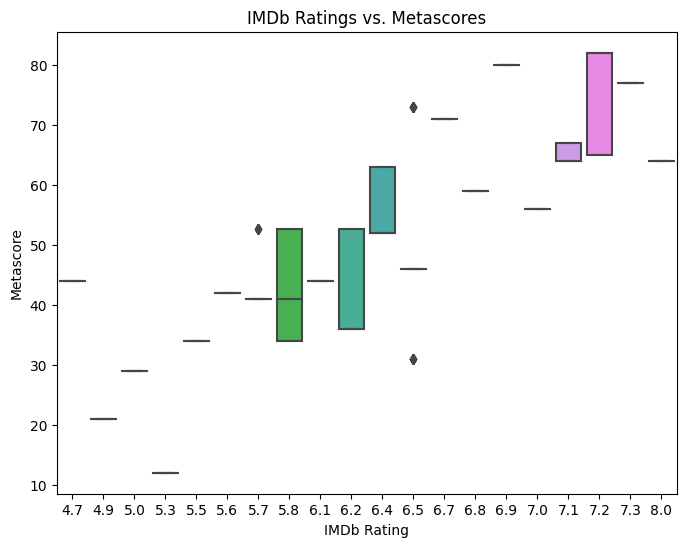

In [9]:
# Creating a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='imdb_rating_updated', y='metascore', data=df)
plt.title("IMDb Ratings vs. Metascores")
plt.xlabel("IMDb Rating")
plt.ylabel("Metascore")
plt.show()

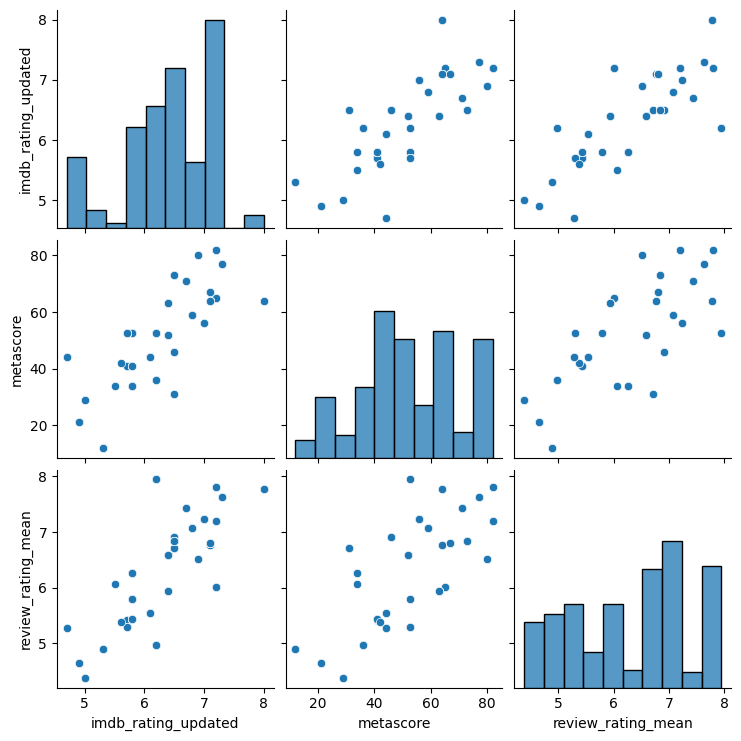

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
data_subset = df[['imdb_rating_updated', 'metascore', 'review_rating_mean']]
sns.pairplot(data_subset)
plt.show()


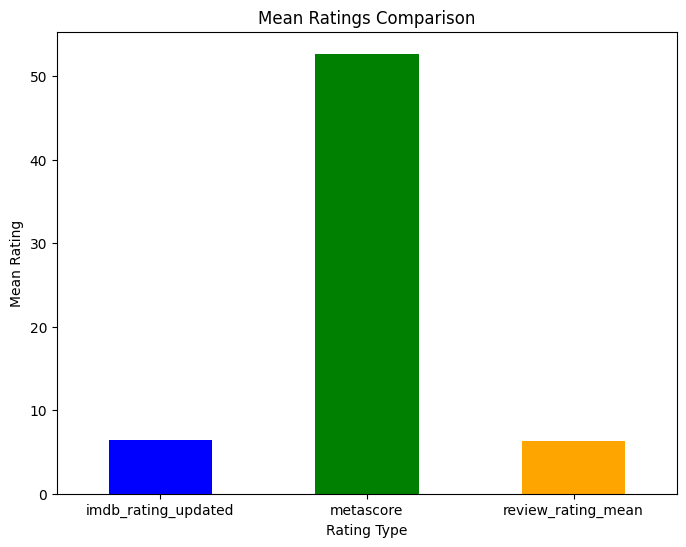

In [11]:
# Calculate mean ratings
mean_ratings = data_subset.mean()
plt.figure(figsize=(8, 6))
mean_ratings.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title("Mean Ratings Comparison")
plt.xlabel("Rating Type")
plt.ylabel("Mean Rating")
plt.xticks(rotation=0)
plt.show()


#**Techniques Used**

1-
**Chi-Squared Test:**

1. **Testing Independence:** The chi-squared test is commonly employed to determine whether there is a statistically significant association or dependence between two categorical variables in a contingency table.

2. **Identifying Influential Factors:** By conducting a chi-squared test, we can evaluate whether one categorical variable significantly influences or predicts the outcomes of another categorical variable.

**How It Helped in Prediction:**

1. **Feature Selection:** By calculating the chi-squared statistic for each categorical feature with respect to the target variable (e.g., IMDb ratings), we identify which features have a strong association with the target. Features with high chi-squared values are more likely to be influential in prediction.

2. **Model Building:** After identifying influential categorical features using the chi-squared test, we can incorporate these features into your predictive model.

3. **Model Interpretation:** Understanding the relationship between categorical features and the target variable helps in interpreting the model's predictions. We can explain why the model predicts a particular outcome by referencing the significant chi-squared relationships.

4. **Improving Model Accuracy:** By including relevant categorical features based on the chi-squared test results, we can potentially enhance the predictive accuracy of our model.



2-
**One-Hot Encoding:**

1. **Handling Categorical Data**

2. **Preserving Information:** One-hot encoding preserves the information contained in categorical variables without imposing any ordinal or numerical assumptions. It does so by creating binary columns (0s and 1s), where each column represents a unique category or label within the original categorical variable.

**How It Helped in Prediction:**

1. **Expanded Feature Space:** One-hot encoding expands the feature space by creating new binary columns for each category.

2. **No Assumptions About Ordinality:** One-hot encoding is suitable when there is no inherent order or ranking among the categories. For example, when encoding movie genres, it doesn't make sense to assign numerical values to genres because there's no natural ordering. One-hot encoding avoids making such assumptions.


In summary, one-hot encoding is a crucial preprocessing step when working with categorical data in machine learning.

It helps ensure that categorical variables can be incorporated into predictive models without losing important information.

By expanding the feature space and making the data suitable for algorithms, one-hot encoding contributes to better predictions and model interpretability.

3- **NLTK (Natural Language Toolkit):**
   - **Why Used:** NLTK is a Python library used for natural language processing (NLP). I used NLTK for text preprocessing tasks such as tokenization, stopword removal, stemming, and sentiment analysis.
   - **How It Helped:** It helped to clean and preprocess textual data from sources like movie descriptions, reviews, or dialogue. This text preprocessing was essential for extracting meaningful features from text and conducting sentiment analysis.

4. **Label Encoding:**
   - **Why Used:** Label encoding is a technique to convert categorical variables into numerical form. It is used for variables like movie names, genres, and other categorical features.
   - **How It Helped:** Label encoding allowed to transform categorical data into a format that machine learning algorithms can work with. This was crucial for including these categorical variables in the prediction model.

5. **Sentiment Analysis:**
   - **Why Used:** Sentiment analysis involves determining the sentiment or emotional tone of text data, such as movie reviews or descriptions.
   - **How It Helped:** Sentiment analysis helped to extract sentiment scores (e.g., polarity and subjectivity) from textual data. These sentiment scores have been used as features to predict IMDb ratings and understand the emotional context of user reviews.

6. **Pearson Correlation:**
   - **Why Used:** Pearson correlation is a statistical measure of the linear relationship between two variables. It is employed to quantify the strength and direction of the relationship between IMDb ratings and other variables (e.g., metascore, user reviews).
   - **How It Helped:** Pearson correlation allowed to identify which variables were correlated with IMDb ratings. This insight helped to determine which features might be good predictors of IMDb ratings and guide feature selection.

7. **Mapping:**
   - **Why Used:** Mapping refers to converting data between different scales, ranges, or formats. It is used it for various purposes, such as scaling features and encoding values.
   - **How It Helped:** Mapping is employed to preprocess and prepare data for modeling.

In summary, these techniques were used to preprocess data, extract relevant features, understand relationships between variables, and prepare the data for predictive modeling.

Combining NLP with sentiment analysis, label encoding, correlation analysis, and mapping allowed to leverage both textual and numerical information to make predictions about **IMDb ratings**.

Each technique served a specific purpose in the  project's data analysis.

#Preprocessing data in Columns

In [12]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['rating'], df['imdb_rating_updated'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-squared statistic: 521.1801444352432
P-value: 3.594216418912733e-76
Degrees of freedom: 57
Expected frequencies table:
[[3.32225914e-02 3.98671096e-01 3.32225914e-02 1.16279070e-01
  1.66112957e-02 1.66112957e-02 3.98671096e-01 2.65780731e-01
  1.49501661e-01 6.47840532e-01 4.65116279e-01 5.81395349e-01
  4.98338870e-02 2.99003322e-01 3.32225914e-02 4.98338870e-02
  2.15946844e-01 1.09634551e+00 4.98338870e-02 8.30564784e-02]
 [1.46179402e-01 1.75415282e+00 1.46179402e-01 5.11627907e-01
  7.30897010e-02 7.30897010e-02 1.75415282e+00 1.16943522e+00
  6.57807309e-01 2.85049834e+00 2.04651163e+00 2.55813953e+00
  2.19269103e-01 1.31561462e+00 1.46179402e-01 2.19269103e-01
  9.50166113e-01 4.82392027e+00 2.19269103e-01 3.65448505e-01]
 [1.26245847e+00 1.51495017e+01 1.26245847e+00 4.41860465e+00
  6.31229236e-01 6.31229236e-01 1.51495017e+01 1.00996678e+01
  5.68106312e+00 2.46179402e+01 1.76744186e+01 2.20930233e+01
  1.89368771e+00 1.13621262e+01 1.26245847e+00 1.89368771e+00
  8.205

**P-value**: The p-value is a measure of the evidence against a null hypothesis.

A small p-value (typically less than 0.05) suggests that we can reject the null hypothesis and conclude that there is a significant association between the variables.

In [13]:
contingency_table = pd.crosstab(df['release_type'], df['imdb_rating_updated'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-squared statistic: 133.71977220473588
P-value: 2.8735841407400185e-19
Degrees of freedom: 19
Expected frequencies table:
[[ 0.22591362  2.71096346  0.22591362  0.79069767  0.11295681  0.11295681
   2.71096346  1.80730897  1.0166113   4.40531561  3.1627907   3.95348837
   0.33887043  2.03322259  0.22591362  0.33887043  1.46843854  7.4551495
   0.33887043  0.56478405]
 [ 1.77408638 21.28903654  1.77408638  6.20930233  0.88704319  0.88704319
  21.28903654 14.19269103  7.9833887  34.59468439 24.8372093  31.04651163
   2.66112957 15.96677741  1.77408638  2.66112957 11.53156146 58.5448505
   2.66112957  4.43521595]]


In [14]:
df_encoded = pd.get_dummies(df, columns=['rating'], prefix=['rating'])
df_encoded = pd.get_dummies(df, columns=['release_type'], prefix='release_type')

In [15]:
contingency_table = pd.crosstab(df['stars'], df['imdb_rating_updated'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-squared statistic: 5719.0
P-value: 0.0
Degrees of freedom: 551
Expected frequencies table:
[[4.65116279e-02 5.58139535e-01 4.65116279e-02 1.62790698e-01
  2.32558140e-02 2.32558140e-02 5.58139535e-01 3.72093023e-01
  2.09302326e-01 9.06976744e-01 6.51162791e-01 8.13953488e-01
  6.97674419e-02 4.18604651e-01 4.65116279e-02 6.97674419e-02
  3.02325581e-01 1.53488372e+00 6.97674419e-02 1.16279070e-01]
 [3.98671096e-02 4.78405316e-01 3.98671096e-02 1.39534884e-01
  1.99335548e-02 1.99335548e-02 4.78405316e-01 3.18936877e-01
  1.79401993e-01 7.77408638e-01 5.58139535e-01 6.97674419e-01
  5.98006645e-02 3.58803987e-01 3.98671096e-02 5.98006645e-02
  2.59136213e-01 1.31561462e+00 5.98006645e-02 9.96677741e-02]
 [5.31561462e-02 6.37873754e-01 5.31561462e-02 1.86046512e-01
  2.65780731e-02 2.65780731e-02 6.37873754e-01 4.25249169e-01
  2.39202658e-01 1.03654485e+00 7.44186047e-01 9.30232558e-01
  7.97342193e-02 4.78405316e-01 5.31561462e-02 7.97342193e-02
  3.45514950e-01 1.75415282e+00 7.9

In [16]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['release_type_encoded'] = label_encoder.fit_transform(df['release_type'])


In [17]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])

In [18]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['stars_encoded'] = label_encoder.fit_transform(df['stars'])
df.drop(columns=['stars'], inplace=True)


In [19]:
print(df['stars_encoded'])

0      13
1      13
2      13
3      13
4      13
       ..
296    24
297    16
298    16
299     7
300     7
Name: stars_encoded, Length: 301, dtype: int64


In [20]:
contingency_table = pd.crosstab(df['genres'], df['imdb_rating_updated'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-squared statistic: 5078.82764846041
P-value: 0.0
Degrees of freedom: 475
Expected frequencies table:
[[4.65116279e-02 5.58139535e-01 4.65116279e-02 1.62790698e-01
  2.32558140e-02 2.32558140e-02 5.58139535e-01 3.72093023e-01
  2.09302326e-01 9.06976744e-01 6.51162791e-01 8.13953488e-01
  6.97674419e-02 4.18604651e-01 4.65116279e-02 6.97674419e-02
  3.02325581e-01 1.53488372e+00 6.97674419e-02 1.16279070e-01]
 [3.98671096e-02 4.78405316e-01 3.98671096e-02 1.39534884e-01
  1.99335548e-02 1.99335548e-02 4.78405316e-01 3.18936877e-01
  1.79401993e-01 7.77408638e-01 5.58139535e-01 6.97674419e-01
  5.98006645e-02 3.58803987e-01 3.98671096e-02 5.98006645e-02
  2.59136213e-01 1.31561462e+00 5.98006645e-02 9.96677741e-02]
 [4.65116279e-02 5.58139535e-01 4.65116279e-02 1.62790698e-01
  2.32558140e-02 2.32558140e-02 5.58139535e-01 3.72093023e-01
  2.09302326e-01 9.06976744e-01 6.51162791e-01 8.13953488e-01
  6.97674419e-02 4.18604651e-01 4.65116279e-02 6.97674419e-02
  3.02325581e-01 1.534883

In [21]:
# LAbel Encoding
unique_genres = set()
for genres_list in df['genres']:
    unique_genres.update(genres_list)
for genre in unique_genres:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)
df.drop(columns=['genres'], inplace=True)


In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['title_encoded'] = label_encoder.fit_transform(df['title'])
df.drop(columns=['title'], inplace=True)

In [23]:
print(df['title_encoded'].unique())

[ 6 28 20 15 11 18 29 19 14 25  5 16 22  9  7 24 13  3  2  4 23  1 21 17
  8 26  0 10 27 12]


In [24]:
contingency_table = pd.crosstab(df['title_encoded'], df['imdb_rating_updated'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-squared statistic: 5719.0
P-value: 0.0
Degrees of freedom: 551
Expected frequencies table:
[[6.64451827e-03 7.97342193e-02 6.64451827e-03 2.32558140e-02
  3.32225914e-03 3.32225914e-03 7.97342193e-02 5.31561462e-02
  2.99003322e-02 1.29568106e-01 9.30232558e-02 1.16279070e-01
  9.96677741e-03 5.98006645e-02 6.64451827e-03 9.96677741e-03
  4.31893688e-02 2.19269103e-01 9.96677741e-03 1.66112957e-02]
 [5.98006645e-02 7.17607973e-01 5.98006645e-02 2.09302326e-01
  2.99003322e-02 2.99003322e-02 7.17607973e-01 4.78405316e-01
  2.69102990e-01 1.16611296e+00 8.37209302e-01 1.04651163e+00
  8.97009967e-02 5.38205980e-01 5.98006645e-02 8.97009967e-02
  3.88704319e-01 1.97342193e+00 8.97009967e-02 1.49501661e-01]
 [3.98671096e-02 4.78405316e-01 3.98671096e-02 1.39534884e-01
  1.99335548e-02 1.99335548e-02 4.78405316e-01 3.18936877e-01
  1.79401993e-01 7.77408638e-01 5.58139535e-01 6.97674419e-01
  5.98006645e-02 3.58803987e-01 3.98671096e-02 5.98006645e-02
  2.59136213e-01 1.31561462e+00 5.9

In [25]:
#URL ENCODING
import pandas as pd
import urllib.parse
df['src_encoded'] = df['src'].apply(lambda x: urllib.parse.quote(x, safe=''))


In [26]:
print(df['src_encoded'])

0      http%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt0180679%...
1      http%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt0180679%...
2      http%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt0180679%...
3      http%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt0180679%...
4      http%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt0180679%...
                             ...                        
296    http%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt2637294%...
297    http%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt1259571%...
298    http%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt1259571%...
299    http%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt0418773%...
300    http%3A%2F%2Fwww.imdb.com%2Ftitle%2Ftt0418773%...
Name: src_encoded, Length: 301, dtype: object


In [27]:
contingency_table = pd.crosstab(df['src'], df['imdb_rating_updated'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-squared statistic: 5719.0
P-value: 0.0
Degrees of freedom: 551
Expected frequencies table:
[[3.32225914e-02 3.98671096e-01 3.32225914e-02 1.16279070e-01
  1.66112957e-02 1.66112957e-02 3.98671096e-01 2.65780731e-01
  1.49501661e-01 6.47840532e-01 4.65116279e-01 5.81395349e-01
  4.98338870e-02 2.99003322e-01 3.32225914e-02 4.98338870e-02
  2.15946844e-01 1.09634551e+00 4.98338870e-02 8.30564784e-02]
 [1.12956811e-01 1.35548173e+00 1.12956811e-01 3.95348837e-01
  5.64784053e-02 5.64784053e-02 1.35548173e+00 9.03654485e-01
  5.08305648e-01 2.20265781e+00 1.58139535e+00 1.97674419e+00
  1.69435216e-01 1.01661130e+00 1.12956811e-01 1.69435216e-01
  7.34219269e-01 3.72757475e+00 1.69435216e-01 2.82392027e-01]
 [4.65116279e-02 5.58139535e-01 4.65116279e-02 1.62790698e-01
  2.32558140e-02 2.32558140e-02 5.58139535e-01 3.72093023e-01
  2.09302326e-01 9.06976744e-01 6.51162791e-01 8.13953488e-01
  6.97674419e-02 4.18604651e-01 4.65116279e-02 6.97674419e-02
  3.02325581e-01 1.53488372e+00 6.9

In [28]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
years = [
   2001,2007,2004,2003,2014,2012,2003,2002,2013,2015,2011,1999,2008,2000,2006,2017,2009,2005
]
years_array = np.array(years)

min_year = years_array.min()
max_year = years_array.max()

# Performing min-max scaling
scaled_years = (years_array - min_year) / (max_year - min_year)
scaler = MinMaxScaler()
df[['year']] = scaler.fit_transform(df[['year']])


In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['moviename'] = label_encoder.fit_transform(df['moviename'])

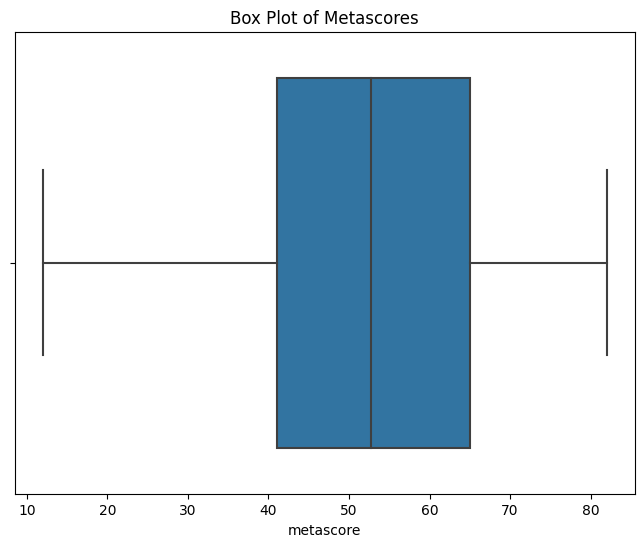

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='metascore', data=df)
plt.xlabel('metascore')
plt.title('Box Plot of Metascores')
plt.show()


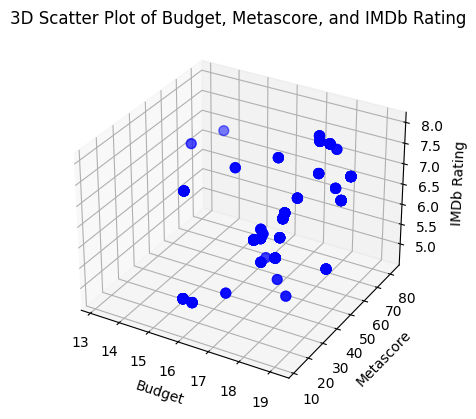

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
budget = df['budget_log']
metascore = df['metascore']
imdb_rating = df['imdb_rating_updated']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

marker_size = 50
marker_color = 'blue'

ax.scatter(budget, metascore, imdb_rating, s=marker_size, c=marker_color, marker='o')
ax.set_xlabel('Budget')
ax.set_ylabel('Metascore')
ax.set_zlabel('IMDb Rating')

plt.title('3D Scatter Plot of Budget, Metascore, and IMDb Rating')

plt.show()


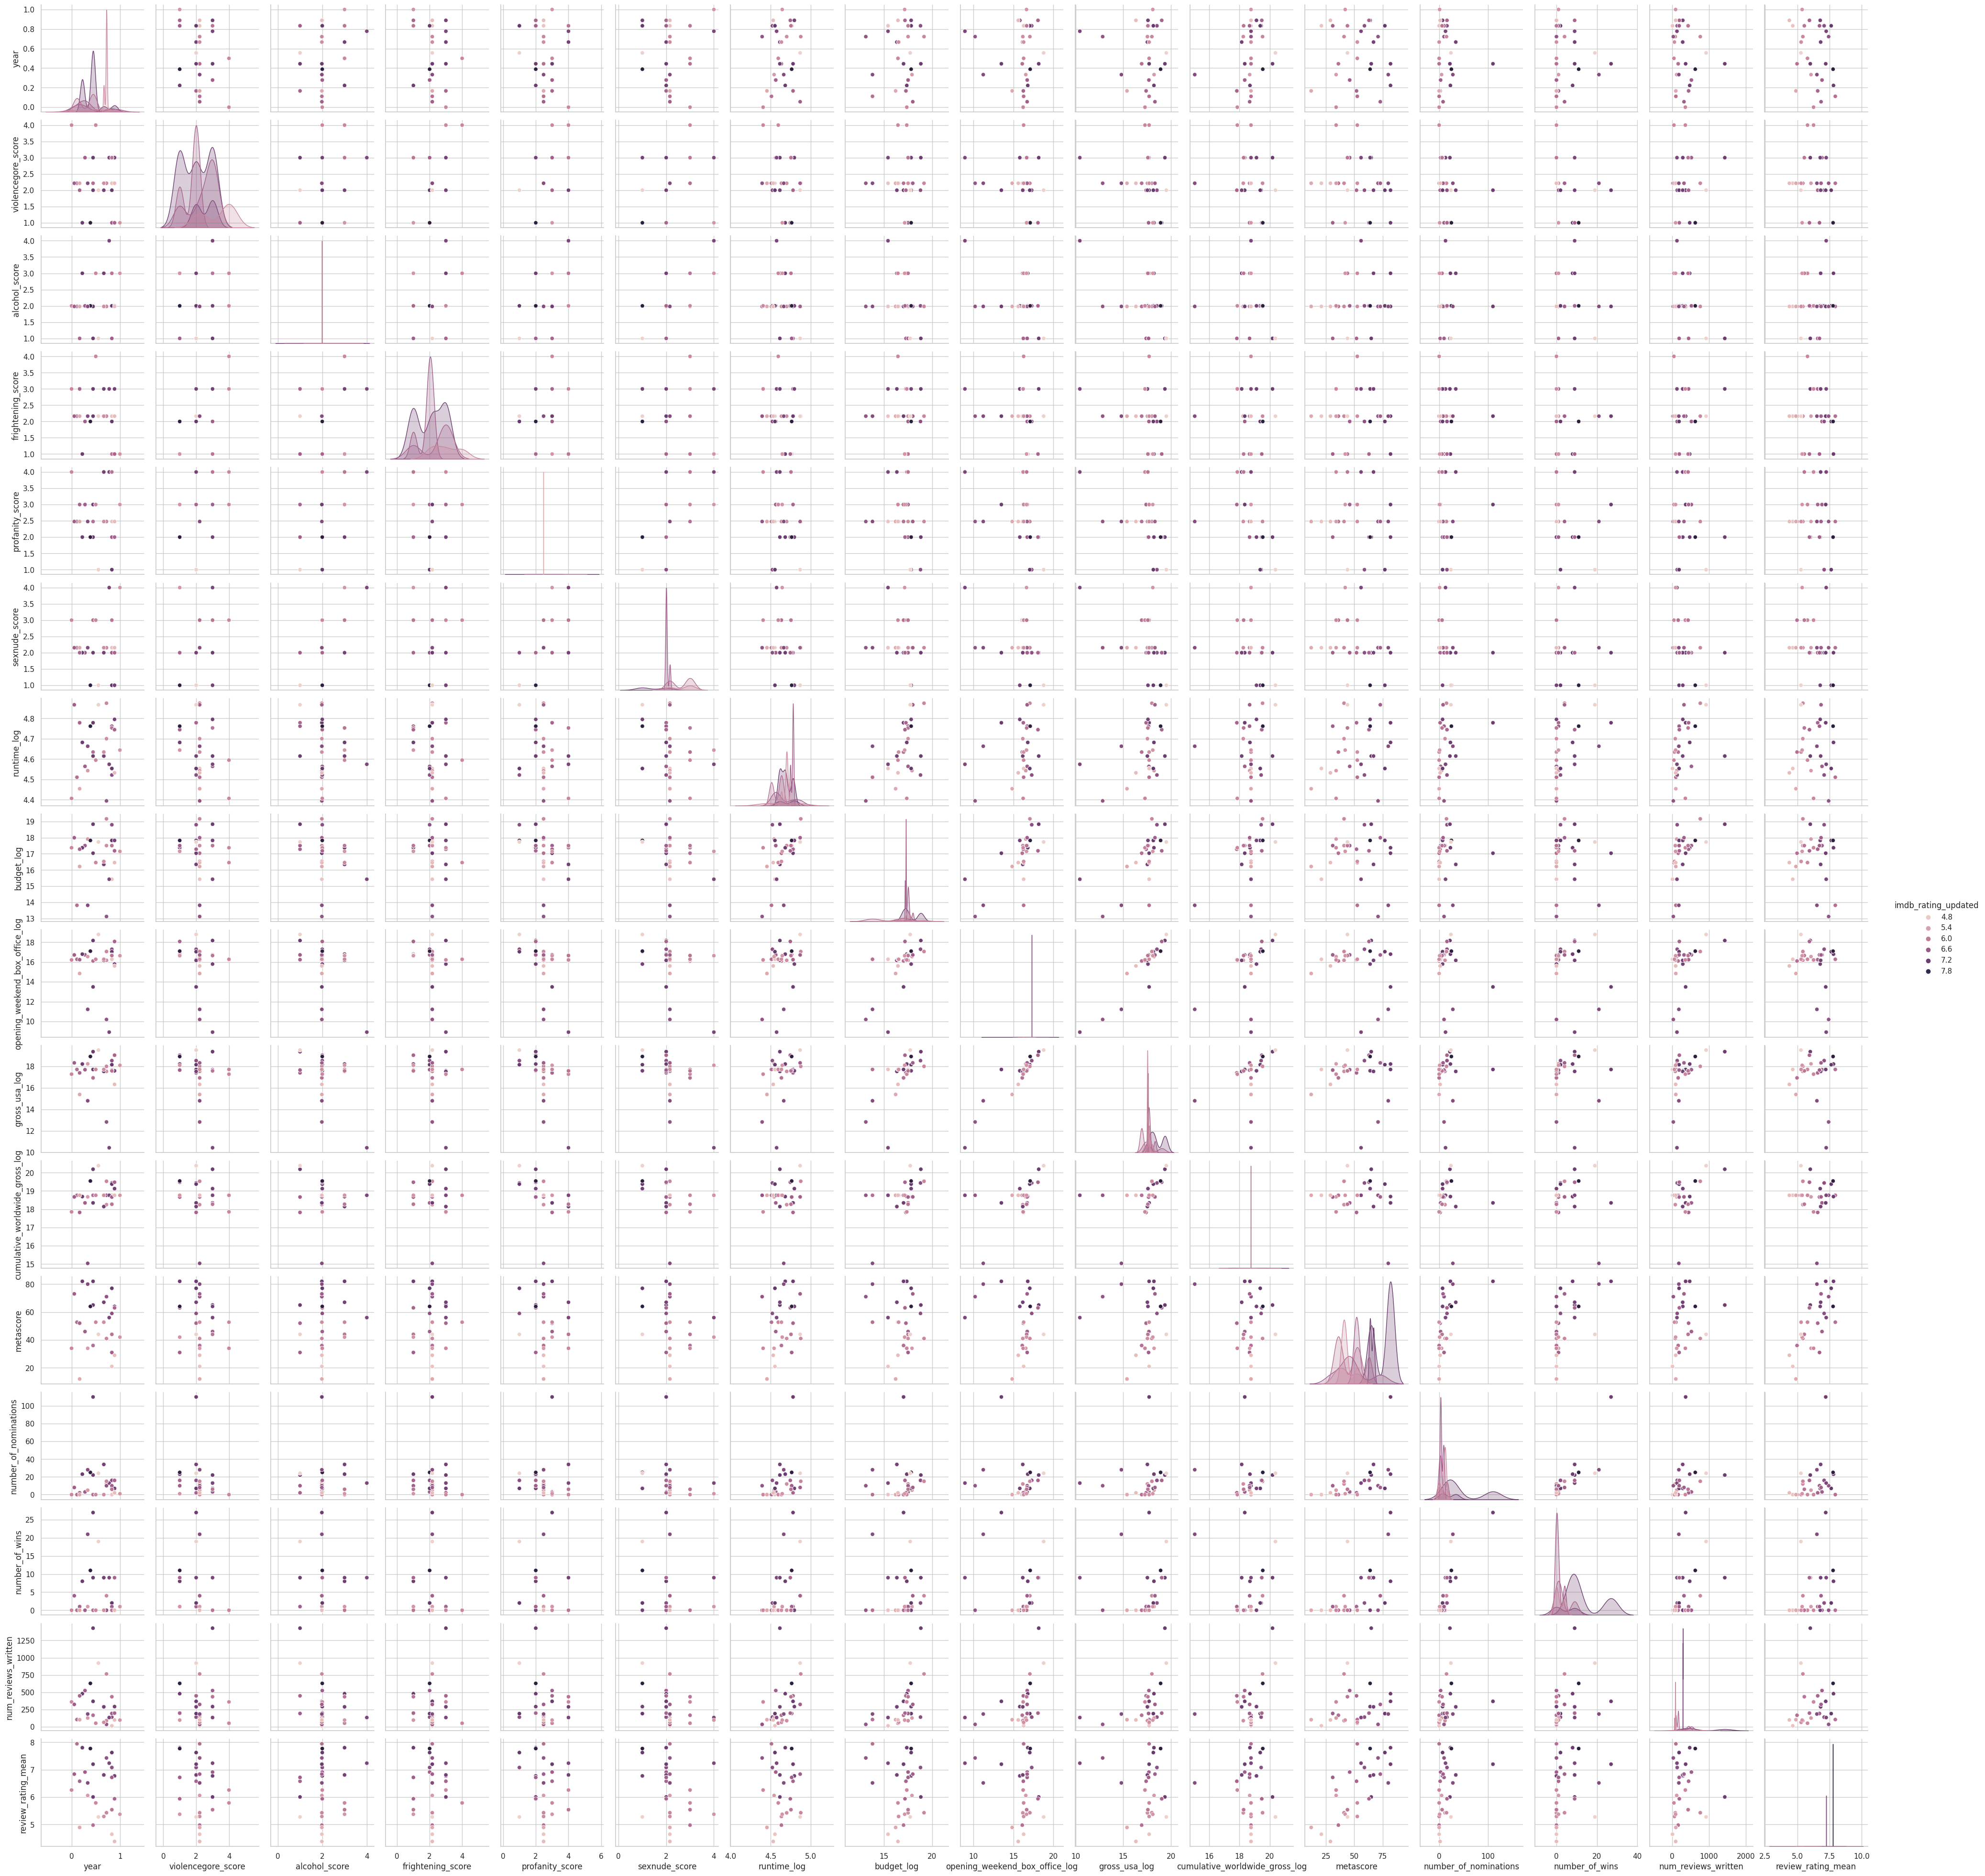

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
columns_to_visualize = [
    'year', 'violencegore_score', 'alcohol_score',
    'frightening_score', 'profanity_score', 'sexnude_score',
    'runtime_log', 'budget_log', 'opening_weekend_box_office_log',
    'gross_usa_log', 'cumulative_worldwide_gross_log',
    'metascore', 'number_of_nominations', 'number_of_wins',
    'num_reviews_written', 'review_rating_mean', 'imdb_rating_updated'
]
sns.pairplot(df[columns_to_visualize], diag_kind='kde', markers="o", hue="imdb_rating_updated")
plt.show()


In [33]:
columns_to_drop = [col for col in df.columns if 'tropes' in col]
columns_to_drop
df.drop(columns=columns_to_drop, inplace=True)

#Handling and Correlating Survey Questions

In [34]:
# Applying sentiment analysis to the specified column and create a new column for sentiment polarity
from textblob import TextBlob
column_name = "What's the most important attribute of this movie that this survey missed?"
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
df['sentiment_polarity'] = df[column_name].apply(get_sentiment_polarity)
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment_category'] = df['sentiment_polarity'].apply(categorize_sentiment)


In [35]:
print(df[['sentiment_polarity', 'sentiment_category']])

     sentiment_polarity sentiment_category
0              0.000000            Neutral
1              0.357143           Positive
2              0.000000            Neutral
3              0.000000            Neutral
4              0.000000            Neutral
..                  ...                ...
296            0.000000            Neutral
297            0.000000            Neutral
298            0.000000            Neutral
299            0.000000            Neutral
300            0.000000            Neutral

[301 rows x 2 columns]


**What's the most important attribute of this movie that this survey missed?**

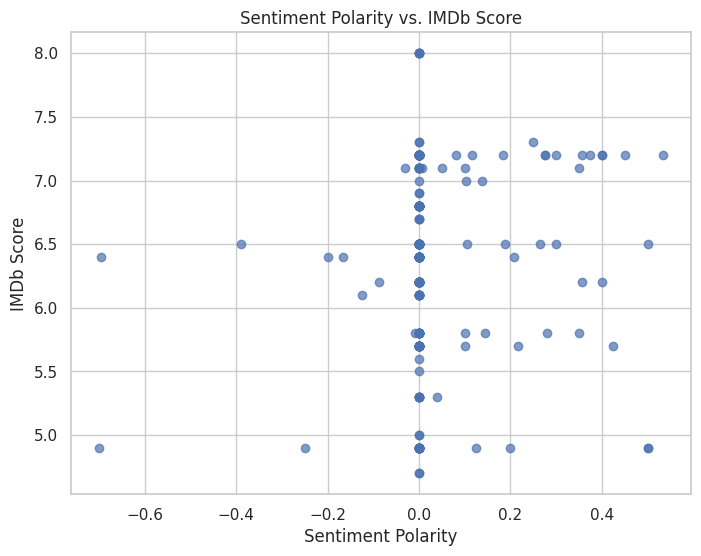

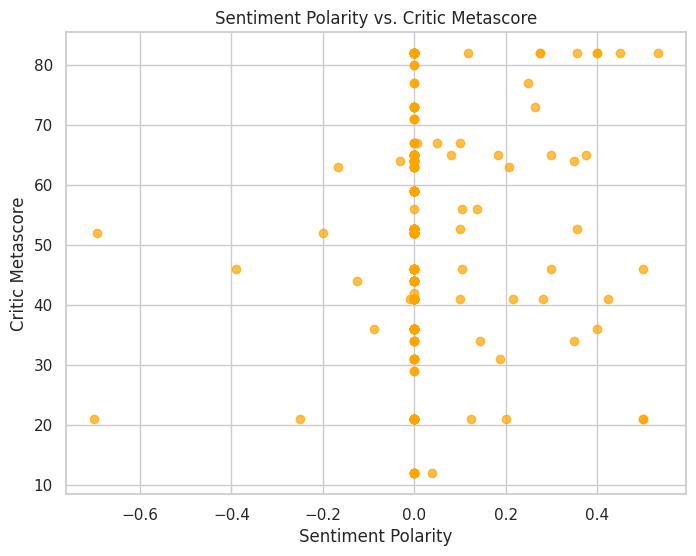

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['sentiment_polarity'], df['imdb_rating_updated'], alpha=0.7)
plt.xlabel('Sentiment Polarity')
plt.ylabel('IMDb Score')
plt.title('Sentiment Polarity vs. IMDb Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['sentiment_polarity'], df['metascore'], alpha=0.7, color='orange')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Critic Metascore')
plt.title('Sentiment Polarity vs. Critic Metascore')
plt.grid(True)
plt.show()


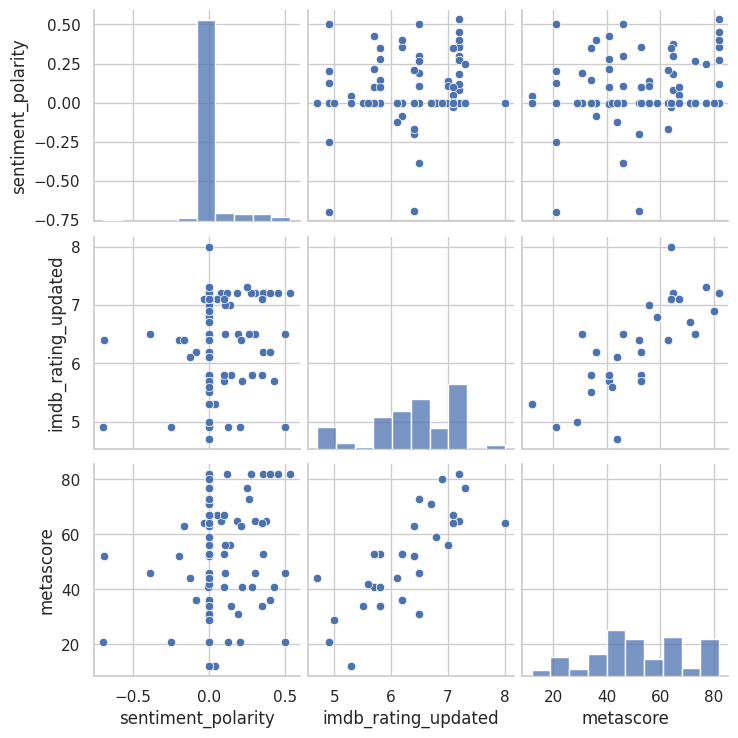

In [37]:
sns.pairplot(data=df, vars=['sentiment_polarity', 'imdb_rating_updated', 'metascore'])
plt.show()

**'How strong was the cinematography?'**

In [38]:
import pandas as pd
from textblob import TextBlob
from scipy.stats import pearsonr
correlation_imdb, _ = pearsonr(df['How strong was the cinematography?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How strong was the cinematography?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.2799820989662292
Correlation with Critic Metascore: 0.25900460330867736


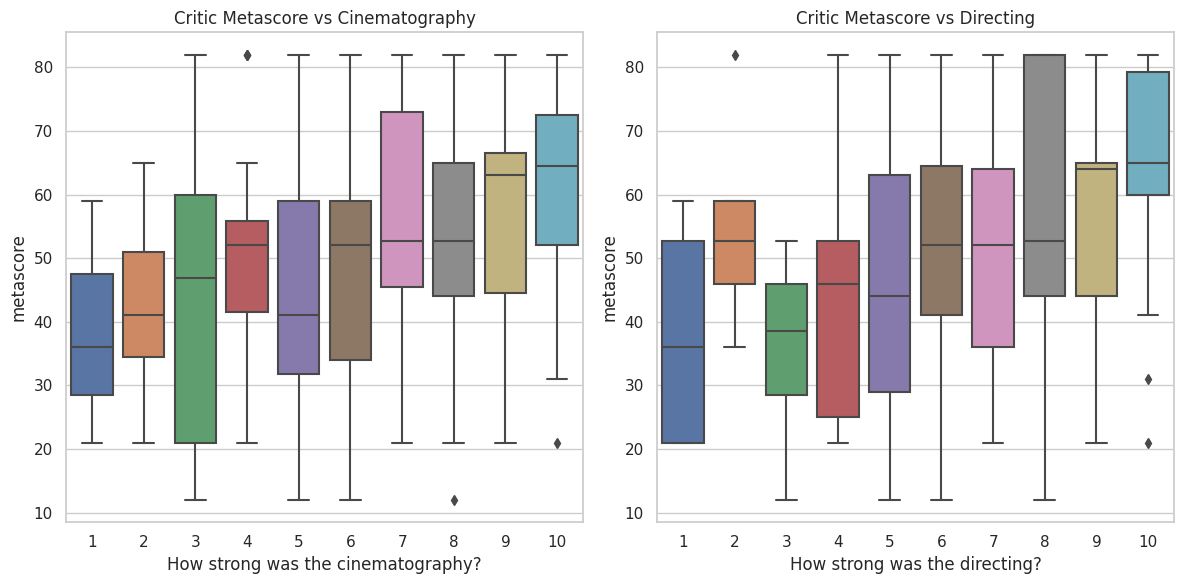

In [39]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='How strong was the cinematography?', y='metascore', data=df)
plt.title('Critic Metascore vs Cinematography')

plt.subplot(1, 2, 2)
sns.boxplot(x='How strong was the directing?', y='metascore', data=df)
plt.title('Critic Metascore vs Directing')

plt.tight_layout()
plt.show()


**'How strong was the directing?'**

In [40]:
import pandas as pd
from textblob import TextBlob
from scipy.stats import pearsonr
correlation_imdb, _ = pearsonr(df['How strong was the directing?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How strong was the directing?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.3408589501690231
Correlation with Critic Metascore: 0.2999934705344905


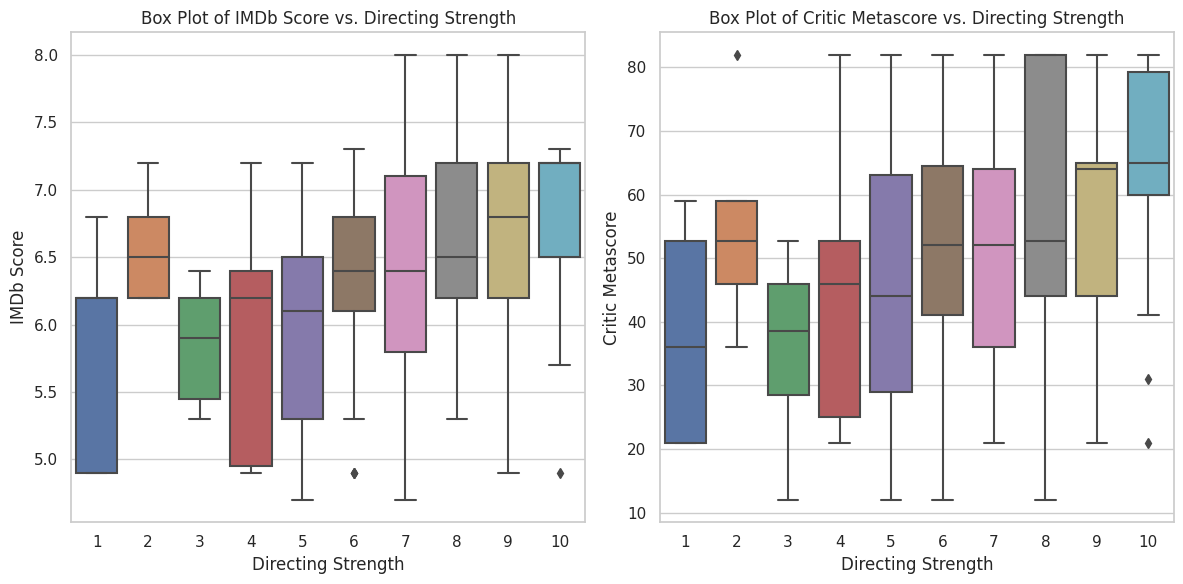

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(x='How strong was the directing?', y='imdb_rating_updated', data=df, ax=axes[0])
axes[0].set_title('Box Plot of IMDb Score vs. Directing Strength')
axes[0].set_xlabel('Directing Strength')
axes[0].set_ylabel('IMDb Score')
sns.boxplot(x='How strong was the directing?', y='metascore', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Critic Metascore vs. Directing Strength')
axes[1].set_xlabel('Directing Strength')
axes[1].set_ylabel('Critic Metascore')
plt.tight_layout()
plt.show()

**'How strong was the acting?'**

In [42]:
import pandas as pd
from textblob import TextBlob
from scipy.stats import pearsonr
correlation_imdb, _ = pearsonr(df['How strong was the acting?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How strong was the acting?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.3829895019257762
Correlation with Critic Metascore: 0.3471820403225809


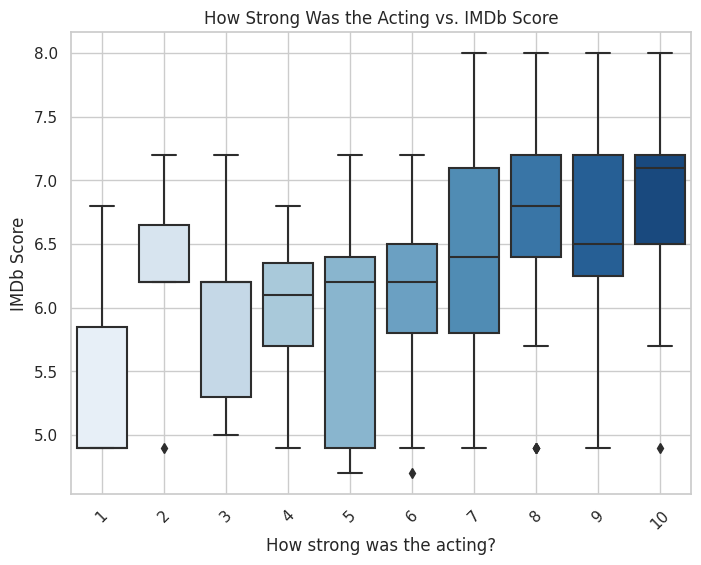

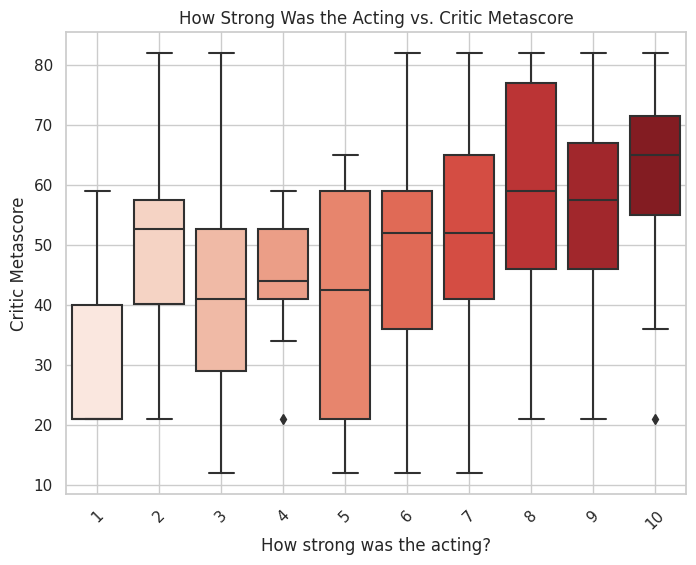

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='How strong was the acting?', y='imdb_rating_updated', data=df, palette='Blues')
plt.xlabel('How strong was the acting?')
plt.ylabel('IMDb Score')
plt.title('How Strong Was the Acting vs. IMDb Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='How strong was the acting?', y='metascore', data=df, palette='Reds')
plt.xlabel('How strong was the acting?')
plt.ylabel('Critic Metascore')
plt.title('How Strong Was the Acting vs. Critic Metascore')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**How much did you enjoy this movie?**

In [44]:
import pandas as pd
from textblob import TextBlob
from scipy.stats import pearsonr
correlation_imdb, _ = pearsonr(df['How much did you enjoy this movie?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How much did you enjoy this movie?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.3179588697905488
Correlation with Critic Metascore: 0.2793278732880288


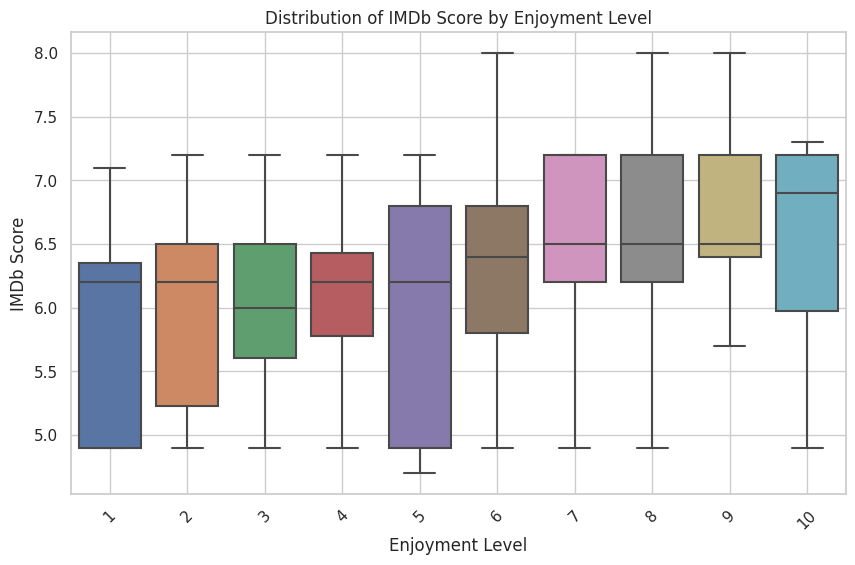

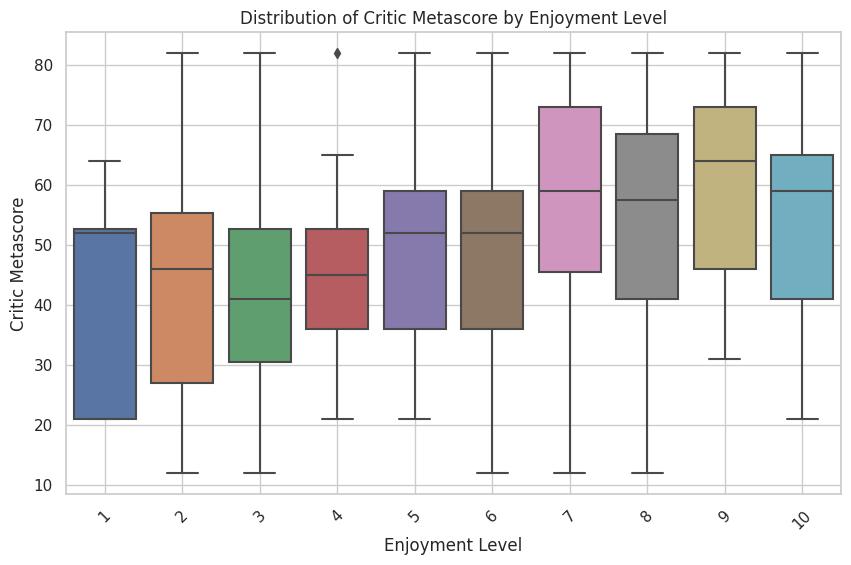

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='How much did you enjoy this movie?', y='imdb_rating_updated', data=df)
plt.xlabel('Enjoyment Level')
plt.ylabel('IMDb Score')
plt.title('Distribution of IMDb Score by Enjoyment Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='How much did you enjoy this movie?', y='metascore', data=df)
plt.xlabel('Enjoyment Level')
plt.ylabel('Critic Metascore')
plt.title('Distribution of Critic Metascore by Enjoyment Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**How important was the movie's score to your emotional experience of the narrative?**

In [46]:
correlation_imdb, _ = pearsonr(df["How important was the movie's score to your emotional experience of the narrative?"], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df["How important was the movie's score to your emotional experience of the narrative?"], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.2562345465114855
Correlation with Critic Metascore: 0.28129905241939185


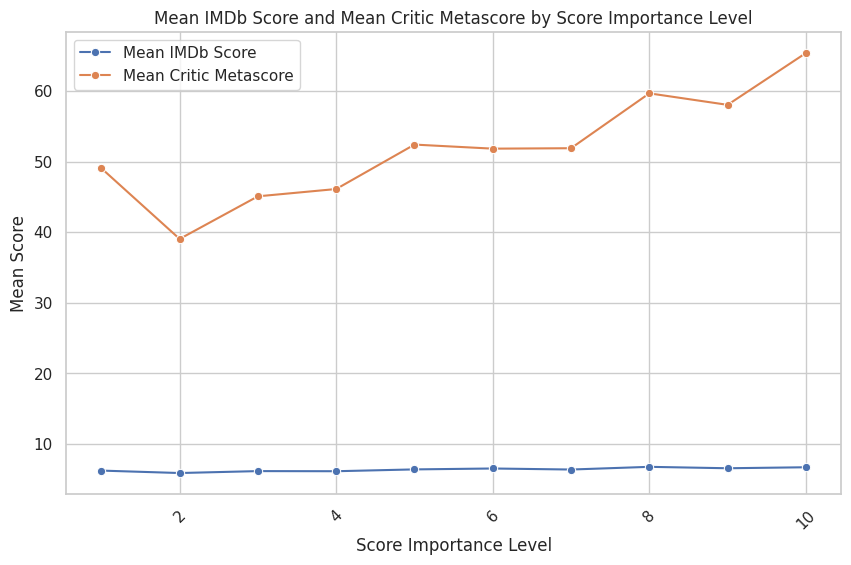

In [47]:
score_importance_groups = df.groupby("How important was the movie's score to your emotional experience of the narrative?")
mean_imdb_scores = score_importance_groups['imdb_rating_updated'].mean()
mean_metascores = score_importance_groups['metascore'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_imdb_scores.index, y=mean_imdb_scores.values, label='Mean IMDb Score', marker='o')
sns.lineplot(x=mean_metascores.index, y=mean_metascores.values, label='Mean Critic Metascore', marker='o')
plt.xlabel('Score Importance Level')
plt.ylabel('Mean Score')
plt.title('Mean IMDb Score and Mean Critic Metascore by Score Importance Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


**How much did you enjoy the movie's score? (that is, the music/sound)**

In [48]:
correlation_imdb, _ = pearsonr(df["How much did you enjoy the movie's score? (that is, the music/sound)"], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df["How much did you enjoy the movie's score? (that is, the music/sound)"], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.2609118484997574
Correlation with Critic Metascore: 0.27258789514974446


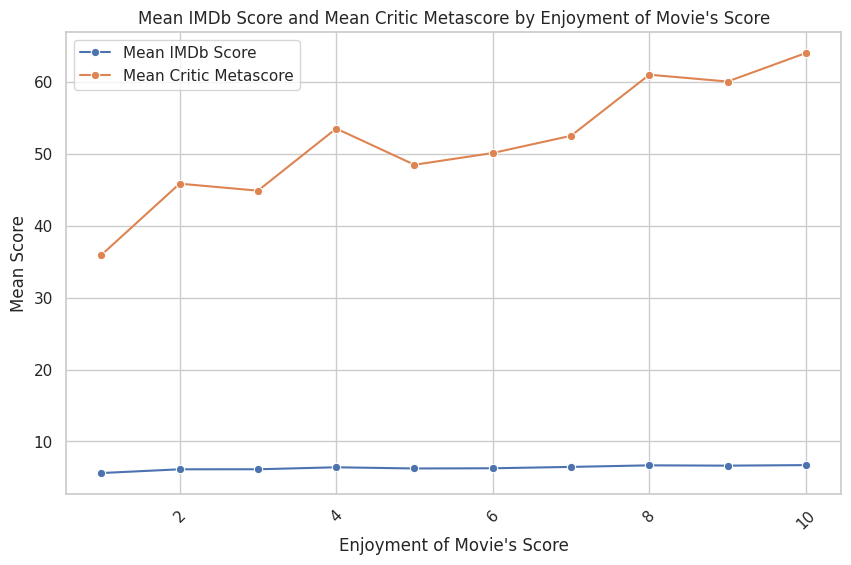

In [49]:

enjoyment_groups = df.groupby("How much did you enjoy the movie's score? (that is, the music/sound)")
mean_imdb_scores = enjoyment_groups['imdb_rating_updated'].mean()
mean_metascores = enjoyment_groups['metascore'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_imdb_scores.index, y=mean_imdb_scores.values, label='Mean IMDb Score', marker='o')
sns.lineplot(x=mean_metascores.index, y=mean_metascores.values, label='Mean Critic Metascore', marker='o')
plt.xlabel("Enjoyment of Movie's Score")
plt.ylabel('Mean Score')
plt.title("Mean IMDb Score and Mean Critic Metascore by Enjoyment of Movie's Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


**How clear and consistent were the themes of this movie?**

In [50]:
mean_themes = df["How clear and consistent were the themes of this movie?"].mean()
mean_metascore = df["metascore"].mean()
df["How clear and consistent were the themes of this movie?"].fillna(mean_themes, inplace=True)
df["metascore"].fillna(mean_metascore, inplace=True)
correlation_imdb, _ = pearsonr(df["How clear and consistent were the themes of this movie?"], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df["How clear and consistent were the themes of this movie?"], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.1695342292445113
Correlation with Critic Metascore: 0.15776800322130452


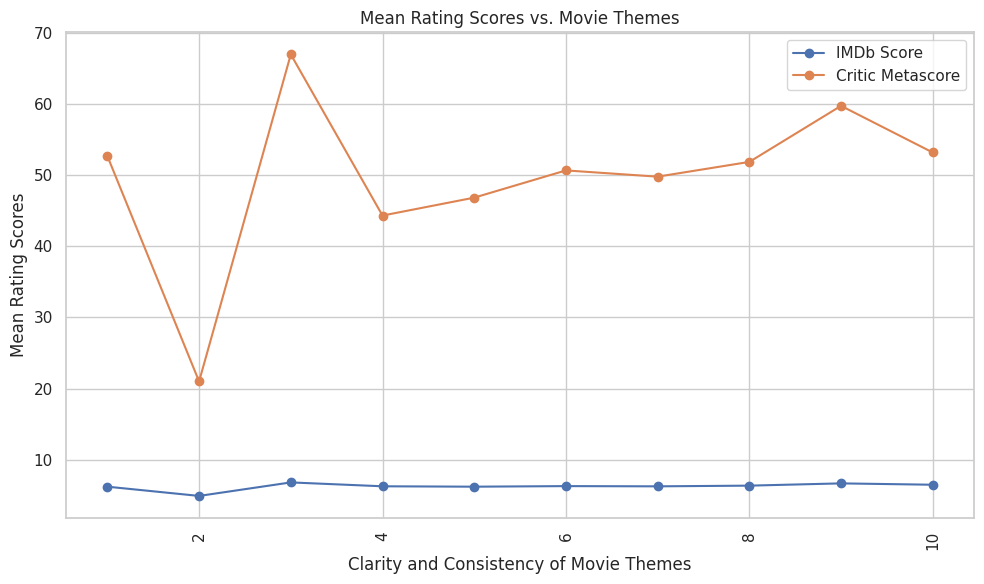

In [51]:
mean_scores = df.groupby("How clear and consistent were the themes of this movie?")[["imdb_rating_updated", "metascore"]].mean()
mean_scores = mean_scores.reset_index()
plt.figure(figsize=(10, 6))
plt.plot(mean_scores["How clear and consistent were the themes of this movie?"], mean_scores["imdb_rating_updated"], label="IMDb Score", marker='o')
plt.plot(mean_scores["How clear and consistent were the themes of this movie?"], mean_scores["metascore"], label="Critic Metascore", marker='o')
plt.xlabel("Clarity and Consistency of Movie Themes")
plt.ylabel("Mean Rating Scores")
plt.title("Mean Rating Scores vs. Movie Themes")
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)**

In [52]:
column_name = "What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)"
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment_polarity1'] = df[column_name].apply(get_sentiment_polarity)
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment_category1'] = df['sentiment_polarity1'].apply(categorize_sentiment)

In [53]:
print(df[['sentiment_polarity1', 'sentiment_category1']])

     sentiment_polarity1 sentiment_category1
0               0.000000             Neutral
1               0.000000             Neutral
2               0.000000             Neutral
3               0.000000             Neutral
4               0.000000             Neutral
..                   ...                 ...
296            -0.083333            Negative
297             0.500000            Positive
298             0.500000            Positive
299             0.500000            Positive
300             0.000000             Neutral

[301 rows x 2 columns]


In [54]:
correlation_imdb, _ = pearsonr(df['sentiment_polarity1'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['sentiment_polarity1'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.13658264290503622
Correlation with Critic Metascore: -0.08340607983853454


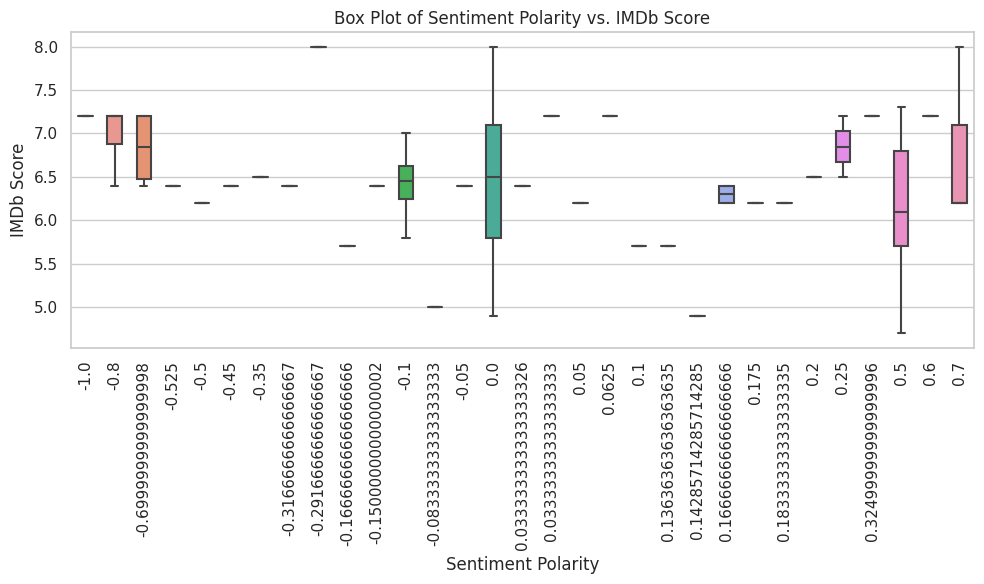

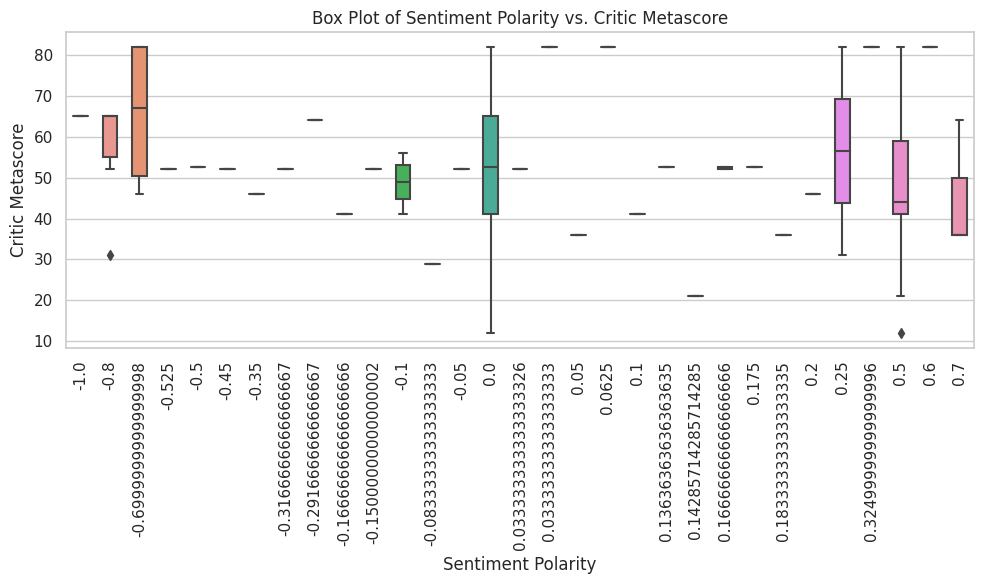

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_polarity1', y='imdb_rating_updated', data=df, width=0.5)
plt.xlabel('Sentiment Polarity')
plt.ylabel('IMDb Score')
plt.title('Box Plot of Sentiment Polarity vs. IMDb Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_polarity1', y='metascore', data=df, width=0.5)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Critic Metascore')
plt.title('Box Plot of Sentiment Polarity vs. Critic Metascore')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


**Creating a composite feature that combines the information from two columns and represents whether an objective was selected in either of the two columns.**

**column1 = 'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)'**

**column2 = "Which of the following would you characterize as among the film's intended artistic objectives?"**


In [56]:
column1 = 'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)'
column2 = "Which of the following would you characterize as among the film's intended artistic objectives?"
df["composite_objectives"] = 0
objectives_to_check = ["Escapism / entertainment", "Cultural critique / social commentary", "Philosophical exploration", "Exploring a strange new world","creating emotional impact","innovation","Encouraging new self-investigation on the part of the viewer","complexity of the mind","spreading awareness",""]
for objective in objectives_to_check:
    df.loc[(df[column1] == objective) | (df[column2] == objective), "composite_objectives"] = 1


In [57]:
print(data['composite_objectives'])

0      0
1      0
2      1
3      0
4      1
      ..
296    0
297    0
298    0
299    1
300    1
Name: composite_objectives, Length: 301, dtype: int64


Survey Questions -

**'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)'**

**"Which of the following would you characterize as among the film's intended artistic objectives?"**

In [58]:
correlation_imdb, _ = pearsonr(df['composite_objectives'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['composite_objectives'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.06916341277311554
Correlation with Critic Metascore: -0.11118907375151357


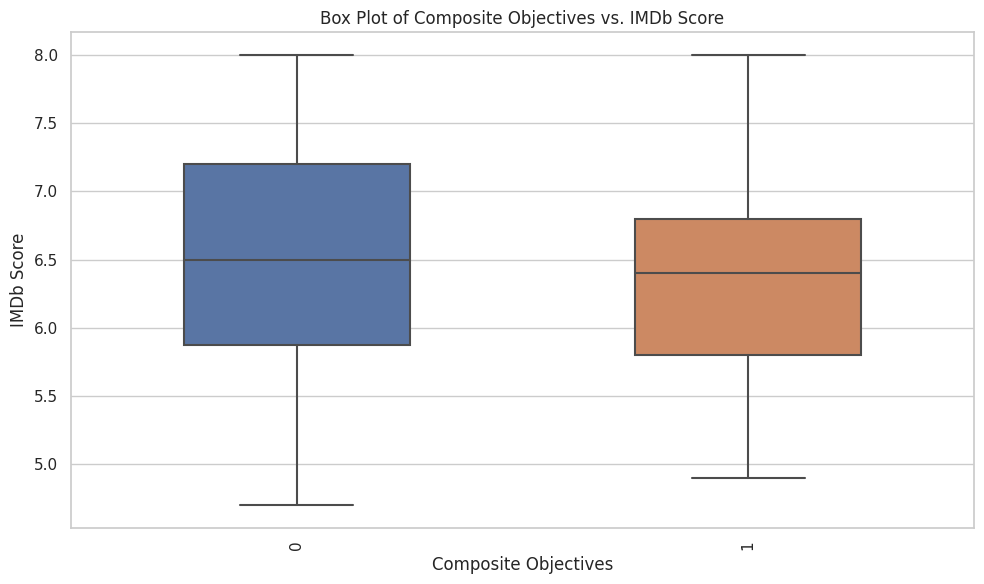

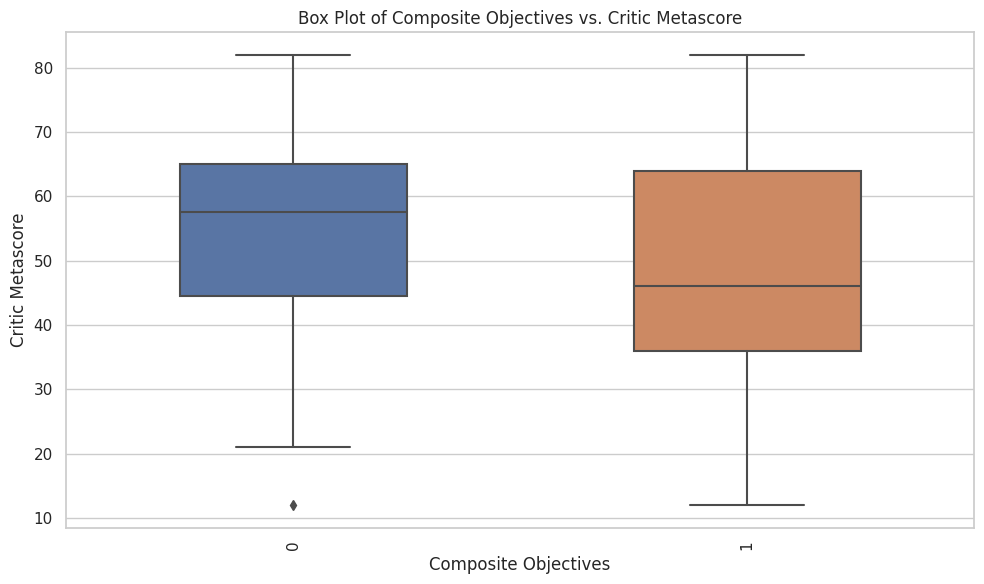

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='composite_objectives', y='imdb_rating_updated', data=df, width=0.5)
plt.xlabel('Composite Objectives')
plt.ylabel('IMDb Score')
plt.title('Box Plot of Composite Objectives vs. IMDb Score')
plt.xticks(rotation=90)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(x='composite_objectives', y='metascore', data=df, width=0.5)
plt.xlabel('Composite Objectives')
plt.ylabel('Critic Metascore')
plt.title('Box Plot of Composite Objectives vs. Critic Metascore')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


**Check all attributes that apply to this movie:**

In [60]:
#Creating Binary Columns
unique_attributes = df['Check all attributes that apply to this movie:'].str.split(';').explode().unique()
for attribute in unique_attributes:
    df[attribute] = 0
for index, row in df.iterrows():
    attributes = row['Check all attributes that apply to this movie:'].split(';')
    df.loc[index, attributes] = 1

In [61]:
df['Combined Attributes'] = df[unique_attributes].sum(axis=1)
print(df['Combined Attributes'])

0      1
1      2
2      2
3      3
4      2
      ..
296    2
297    1
298    5
299    2
300    3
Name: Combined Attributes, Length: 301, dtype: int64


In [62]:
correlation_imdb, _ = pearsonr(df['Combined Attributes'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['Combined Attributes'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.032277845749919605
Correlation with Critic Metascore: -0.07355347055514452


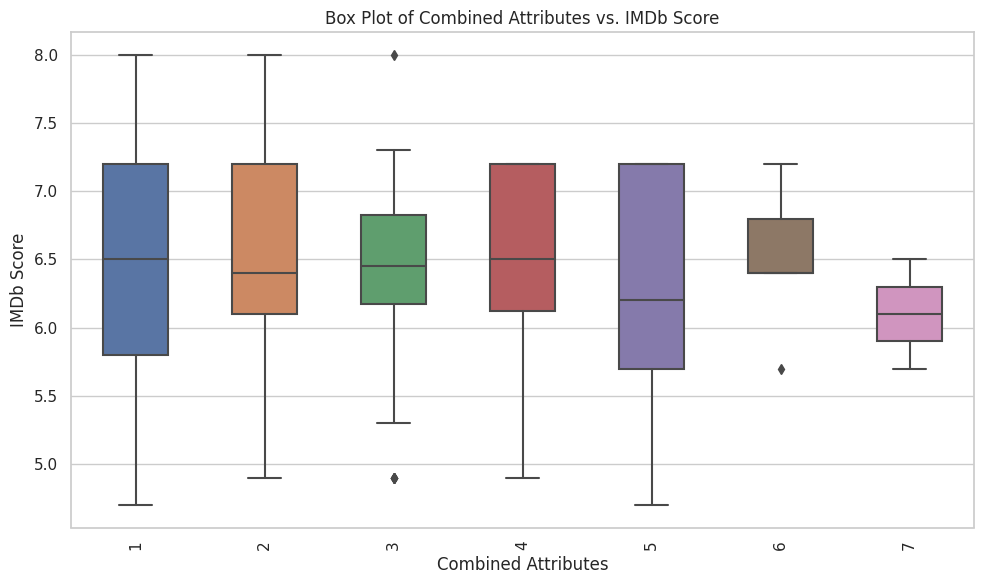

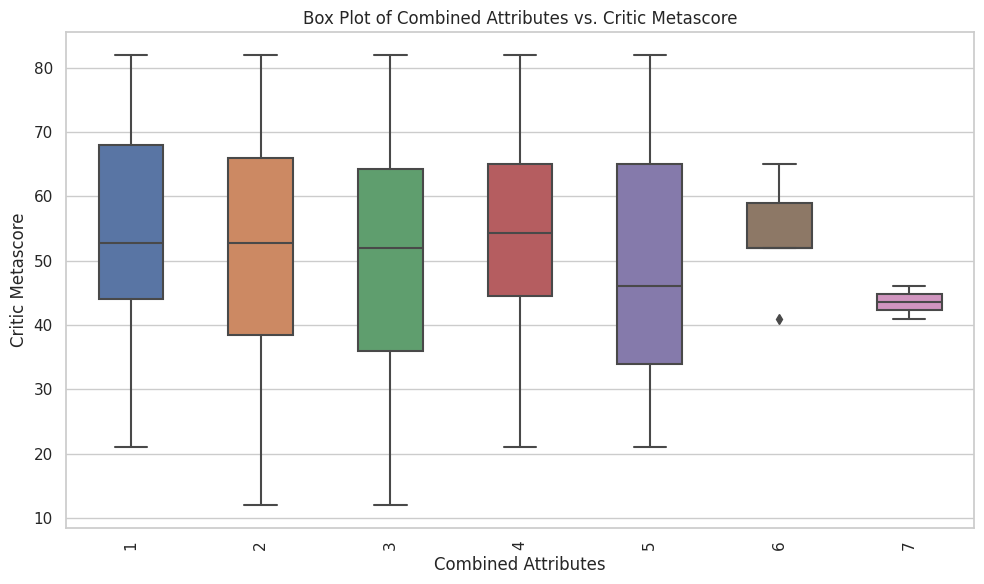

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Combined Attributes', y='imdb_rating_updated', data=df, width=0.5)
plt.xlabel('Combined Attributes')
plt.ylabel('IMDb Score')
plt.title('Box Plot of Combined Attributes vs. IMDb Score')
plt.xticks(rotation=90)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Combined Attributes', y='metascore', data=df, width=0.5)
plt.xlabel('Combined Attributes')
plt.ylabel('Critic Metascore')
plt.title('Box Plot of Combined Attributes vs. Critic Metascore')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()



**'By the end of the movie, how intellectually engaged did you feel?'**

In [64]:
correlation_imdb, _ = pearsonr(df['By the end of the movie, how intellectually engaged did you feel?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['By the end of the movie, how intellectually engaged did you feel?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.18500264893285698
Correlation with Critic Metascore: 0.16431978252991208


**'By the end of the movie, how emotionally affected were you?'**

In [65]:
correlation_imdb, _ = pearsonr(df['By the end of the movie, how emotionally affected were you?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['By the end of the movie, how emotionally affected were you?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.20458535125543476
Correlation with Critic Metascore: 0.15163987286710223


**"What characteristics apply to this movie's dialogue?"**

In [66]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    cleaned_text = ' '.join(tokens)

    return cleaned_text

df['cleaned_dialogue'] = df["What characteristics apply to this movie's dialogue?"].apply(preprocess_text)

# Feature Extraction (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_dialogue'])

# Sentiment Analysis (using TextBlob)
from textblob import TextBlob
def calculate_sentiment(text):
    sentiment = TextBlob(text)
    return sentiment.sentiment.polarity, sentiment.sentiment.subjectivity
df['sentiment_polarity'], df['sentiment_subjectivity'] = zip(*df['cleaned_dialogue'].apply(calculate_sentiment))
correlation_imdb = df['imdb_rating_updated'].corr(df['sentiment_polarity'])
correlation_metascore = df['metascore'].corr(df['sentiment_polarity'])
correlation_gross_usa = df['gross_usa'].corr(df['sentiment_polarity'])
print("Correlation with IMDb Rating:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_metascore)
print("Correlation with Gross USA Ticket Sales:", correlation_gross_usa)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Correlation with IMDb Rating: -0.046765823038095934
Correlation with Critic Metascore: -0.05782907265293751
Correlation with Gross USA Ticket Sales: -0.04127458362311627


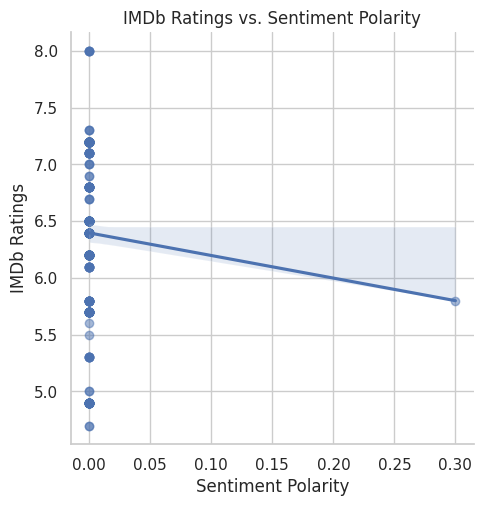

In [67]:
sns.lmplot(x='sentiment_polarity', y='imdb_rating_updated', data=df, scatter_kws={'alpha':0.5})
plt.title('IMDb Ratings vs. Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('IMDb Ratings')
plt.grid(True)
plt.show()

**How engaging was the dialogue?**

In [68]:
correlation_imdb, _ = pearsonr(df['How engaging was the dialogue?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How engaging was the dialogue?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)


Correlation with IMDb Score: 0.19717684392651677
Correlation with Critic Metascore: 0.22284794144615763


**How important was the immersiveness of the world for this movie?**

In [69]:
correlation_imdb, _ = pearsonr(df['How important was the immersiveness of the world for this movie?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How important was the immersiveness of the world for this movie?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)


Correlation with IMDb Score: 0.11667673944640466
Correlation with Critic Metascore: 0.08302891225780143


**How immersive did the world of the movie feel?**

In [70]:
correlation_imdb, _ = pearsonr(df['How immersive did the world of the movie feel?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How immersive did the world of the movie feel?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)


Correlation with IMDb Score: 0.19340751839765835
Correlation with Critic Metascore: 0.16743877595897827


***Correlation between IMDb rating and Metascore***

In [71]:
columns_of_interest = ['imdb_rating_updated', 'metascore', 'gross_usa', 'review_rating_mean']
correlation_results = data[columns_of_interest].corr()
imdb_metascore_corr = correlation_results['imdb_rating_updated']['metascore']
print(f"Correlation between IMDb rating and Metascore: {imdb_metascore_corr}")

Correlation between IMDb rating and Metascore: 0.8477178547254323


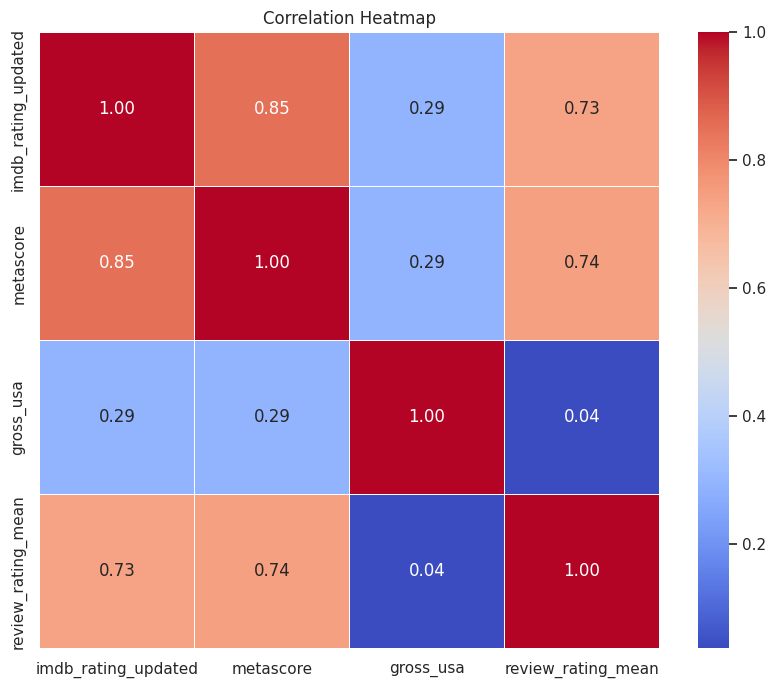

In [72]:
columns_of_interest = ['imdb_rating_updated', 'metascore', 'gross_usa', 'review_rating_mean']
correlation_results = data[columns_of_interest].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [73]:
df['Character-driven'] = df['Was the movie plot-driven or character-driven?'].apply(lambda x: 1 if 'Character-driven' in x else 0)
df['Plot-driven'] = df['Was the movie plot-driven or character-driven?'].apply(lambda x: 1 if 'Plot-driven' in x else 0)
df['Both'] = df['Was the movie plot-driven or character-driven?'].apply(lambda x: 1 if 'Both' in x else 0)
print(df)


    What is this movie's name? (Use exact spelling)  \
0                          Escanaba In Da Moonlight   
1                          Escanaba in da Moonlight   
2                          Escanaba in da Moonlight   
3                          Escanaba in Da Moonlight   
4                          Escanaba in da Moonlight   
..                                              ...   
296                          Hot Tub Time Machine 2   
297                     The Twilight Saga: New Moon   
298                     The Twilight Saga: New Moon   
299                                         Junebug   
300                                         Junebug   

     What year was this movie released?         How long is this movie?  \
0                                  2001               1 hour 32 minutes   
1                                  2001  1hour, 31 minutes ; 91 minutes   
2                                  2001               1 hour 32 minutes   
3                                  2001

**Was the movie plot-driven or character-driven?**

In [74]:
correlation_character = df['Character-driven'].corr(df['imdb_rating_updated'])
correlation_plot = df['Plot-driven'].corr(df['imdb_rating_updated'])
correlation_both = df['Both'].corr(df['imdb_rating_updated'])
print("Correlation with Character-driven:", correlation_character)
print("Correlation with Plot-driven:", correlation_plot)
print("Correlation with Both:", correlation_both)

Correlation with Character-driven: -0.13275300215113692
Correlation with Plot-driven: 0.058029771810896254
Correlation with Both: 0.12117035019090597


**"Which of the following describes the movie's climax? Check all that apply"**

In [75]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
df["Climax_Sentiment"] = df["Which of the following describes the movie's climax? Check all that apply"].apply(get_sentiment)
print(df[["Which of the following describes the movie's climax? Check all that apply", "Climax_Sentiment"]])


    Which of the following describes the movie's climax? Check all that apply  \
0                                                Funny                          
1                                                Funny                          
2                                           Funny;Slow                          
3                                                Funny                          
4                                    Funny;Frightening                          
..                                                 ...                          
296                                              Funny                          
297                       Violent;Romantic;Frightening                          
298                               Romantic;Frightening                          
299                                Heartbreaking;Death                          
300                           Heartbreaking;Death;Slow                          

     Climax_Sentiment  
0  

In [76]:
correlation_imdb, _ = pearsonr(df['Climax_Sentiment'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['Climax_Sentiment'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.08151298243814006
Correlation with Critic Metascore: 0.10467140253281337


**What were the qualities of the ending? Check all that apply**

In [77]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
df["Sentiment"] = df['What were the qualities of the ending? Check all that apply'].apply(get_sentiment)
print(df[['What were the qualities of the ending? Check all that apply', "Sentiment"]])

    What were the qualities of the ending? Check all that apply  Sentiment
0                                     Happy;Satisfying                 0.0
1                                                Happy                 0.8
2                                     Happy;Satisfying                 0.0
3                                     Happy;Satisfying                 0.0
4                                     Happy;Satisfying                 0.0
..                                                 ...                 ...
296                                              Happy                 0.8
297                                         Satisfying                 0.5
298                                   Happy;Satisfying                 0.0
299                                                Sad                -0.5
300                                                Sad                -0.5

[301 rows x 2 columns]


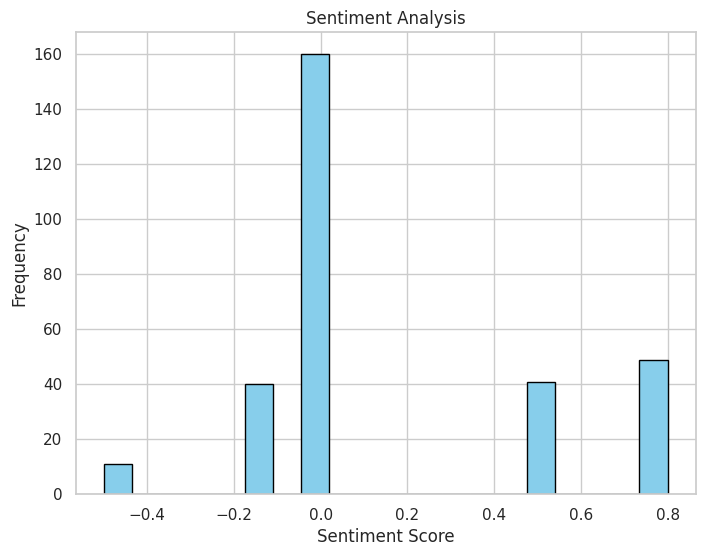

In [78]:
plt.figure(figsize=(8, 6))
plt.hist(df["Sentiment"], bins=20, color='skyblue', edgecolor='black')
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [79]:
correlation_imdb, _ = pearsonr(df['Sentiment'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['Sentiment'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.1983015606041188
Correlation with Critic Metascore: -0.09775854787811271


**Creating  Timestamps for percentages**

In [80]:
import re
x = list(df['Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)'])
x
df_sag = pd.DataFrame({'Response': x})

def clean_and_convert(response):
    response = re.sub(r'[^\w\s]', '', response.lower())
    percentages = response.split(';')
    numeric_values = []
    for percent in percentages:
        match = re.search(r'\d+', percent)
        if match:
            numeric_values.append(int(match.group()))
    if numeric_values:
        average_percent = sum(numeric_values) / len(numeric_values)
        return "Low Sag" if average_percent < 30 else "Medium Sag" if average_percent < 60 else "High Sag"
    else:
        return "No Sag"
df_sag['Sentiment'] = df_sag['Response'].apply(clean_and_convert)
print(df_sag)

                                      Response   Sentiment
0                                       40% in  Medium Sag
1    20% in;30% in;40% in;50% in;60% in;70% in     Low Sag
2                                       50% in  Medium Sag
3                         20% in;30% in;60% in     Low Sag
4                         30% in;40% in;50% in  Medium Sag
..                                         ...         ...
296         10% in;30% in;40% in;60% in;70% in     Low Sag
297                                     20% in     Low Sag
298                              30% in;90% in  Medium Sag
299                          18.5%; 28%; 74.7%    High Sag
300                                     30% in  Medium Sag

[301 rows x 2 columns]


In [81]:
df_sag_encoded = pd.get_dummies(df_sag, columns=['Sentiment'], drop_first=True)
df_sag_encoded.rename(columns={'Sentiment_Medium Sag': 'Sentiment'}, inplace=True)
print(df_sag_encoded)


                                      Response  Sentiment_Low Sag  Sentiment  \
0                                       40% in                  0          1   
1    20% in;30% in;40% in;50% in;60% in;70% in                  1          0   
2                                       50% in                  0          1   
3                         20% in;30% in;60% in                  1          0   
4                         30% in;40% in;50% in                  0          1   
..                                         ...                ...        ...   
296         10% in;30% in;40% in;60% in;70% in                  1          0   
297                                     20% in                  1          0   
298                              30% in;90% in                  0          1   
299                          18.5%; 28%; 74.7%                  0          0   
300                                     30% in                  0          1   

     Sentiment_No Sag  
0              

In [82]:
correlation, _ = pearsonr(df_sag_encoded['Sentiment'], df['imdb_rating_updated'])
print("Correlation between Was there a noticeable sag in plot tension at any of the following points of the movie? and IMDb Rating:", correlation)

Correlation between Was there a noticeable sag in plot tension at any of the following points of the movie? and IMDb Rating: 0.019343349372695454


**Did the movie feature a plot twist?**

In [83]:
df_encoded = pd.get_dummies(df, columns=['Did the movie feature a plot twist?'], prefix='Plot_Twist')
print(df_encoded)

    What is this movie's name? (Use exact spelling)  \
0                          Escanaba In Da Moonlight   
1                          Escanaba in da Moonlight   
2                          Escanaba in da Moonlight   
3                          Escanaba in Da Moonlight   
4                          Escanaba in da Moonlight   
..                                              ...   
296                          Hot Tub Time Machine 2   
297                     The Twilight Saga: New Moon   
298                     The Twilight Saga: New Moon   
299                                         Junebug   
300                                         Junebug   

     What year was this movie released?         How long is this movie?  \
0                                  2001               1 hour 32 minutes   
1                                  2001  1hour, 31 minutes ; 91 minutes   
2                                  2001               1 hour 32 minutes   
3                                  2001

In [84]:
correlation_imdb, _ = pearsonr(df_encoded['Plot_Twist_No'], df['imdb_rating_updated'])
correlation_imdb1, _ = pearsonr(df_encoded['Plot_Twist_Yes'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df_encoded['Plot_Twist_Yes'], df['metascore'])
correlation_critic1, _ = pearsonr(df_encoded['Plot_Twist_No'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.018266941264126757
Correlation with Critic Metascore: -0.08129296827685041


**Did the movie feature a substantial turning point in the plot?**

In [85]:
df_encoded = pd.get_dummies(data, columns=['Did the movie feature a substantial turning point in the plot?'], prefix='Turning_Point')
print(df_encoded)

    What is this movie's name? (Use exact spelling)  \
0                          Escanaba In Da Moonlight   
1                          Escanaba in da Moonlight   
2                          Escanaba in da Moonlight   
3                          Escanaba in Da Moonlight   
4                          Escanaba in da Moonlight   
..                                              ...   
296                          Hot Tub Time Machine 2   
297                     The Twilight Saga: New Moon   
298                     The Twilight Saga: New Moon   
299                                         Junebug   
300                                         Junebug   

     What year was this movie released?         How long is this movie?  \
0                                  2001               1 hour 32 minutes   
1                                  2001  1hour, 31 minutes ; 91 minutes   
2                                  2001               1 hour 32 minutes   
3                                  2001

In [86]:
correlation_imdb, _ = pearsonr(df_encoded['Turning_Point_No'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df_encoded['Turning_Point_Yes'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df_encoded['Turning_Point_Yes'], df['metascore'])
correlation_imdb, _ = pearsonr(df_encoded['Turning_Point_No'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.16057271412396812
Correlation with Critic Metascore: 0.16233418218359735


**How fast-paced was the end of the movie?**

In [87]:
correlation_imdb, _ = pearsonr(df_encoded['How fast-paced was the end of the movie?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df_encoded['How fast-paced was the end of the movie?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.19390206254933084
Correlation with Critic Metascore: 0.11268901909282028


**How fast-paced was the end of the movie?**

In [88]:
correlation_imdb, _ = pearsonr(df_encoded['How fast-paced was the end of the movie?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df_encoded['How fast-paced was the middle of the movie?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.19390206254933084
Correlation with Critic Metascore: 0.015772087966889878


**How fast-paced was the beginning of the movie?**

In [89]:
correlation_imdb, _ = pearsonr(df_encoded['How fast-paced was the beginning of the movie?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df_encoded['How fast-paced was the beginning of the movie?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.005121197713760074
Correlation with Critic Metascore: -0.035576535977447254


**How fast-paced was this movie overall?**

In [90]:
correlation_imdb, _ = pearsonr(df_encoded['How fast-paced was this movie overall?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df_encoded['How fast-paced was this movie overall?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.14056497607864932
Correlation with Critic Metascore: 0.06246733308840728


**How many narrators/perspectives were there? (Integer answer)**

In [91]:
df['How many narrators/perspectives were there? (Integer answer)'] = df['How many narrators/perspectives were there? (Integer answer)'].astype(str)
df['How many narrators/perspectives were there? (Integer answer)'] = df['How many narrators/perspectives were there? (Integer answer)'].str.extract(r'(\d+)').astype(float)
mean_value = df['How many narrators/perspectives were there? (Integer answer)'].mean()
# Fill NaN values with the mean
df['How many narrators/perspectives were there? (Integer answer)'].fillna(mean_value, inplace=True)

In [92]:
correlation_imdb, _ = pearsonr(df['How many narrators/perspectives were there? (Integer answer)'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How many narrators/perspectives were there? (Integer answer)'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.5131707741137875
Correlation with Critic Metascore: -0.416278261401106


**How invested did you feel in the characters?**

In [93]:
correlation_imdb, _ = pearsonr(df['How invested did you feel in the characters?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How invested did you feel in the characters?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.22500091316592696
Correlation with Critic Metascore: 0.20582184535950976


**To what extent did the characters feel real and complex?**

In [94]:
correlation_imdb, _ = pearsonr(df['To what extent did the characters feel real and complex?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['To what extent did the characters feel real and complex?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.22266300411800125
Correlation with Critic Metascore: 0.22192290359370287


**How much did the main characters change over the course of the story?**

In [95]:
correlation_imdb, _ = pearsonr(df['How much did the main characters change over the course of the story?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How much did the main characters change over the course of the story?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.04580791496354674
Correlation with Critic Metascore: -0.013425007348225056


**How invested did you feel in the drama?**

In [96]:
correlation_imdb, _ = pearsonr(df['How invested did you feel in the drama?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['How invested did you feel in the drama?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.2702343921435166
Correlation with Critic Metascore: 0.1946748817161066


**What were the characteristics of the antagonist?**

In [97]:
df_encoded = pd.get_dummies(df, columns=['What were the characteristics of the antagonist? '], prefix='Antagonist')

In [98]:
# Define a mapping of categories to numerical labels
category_mapping = {
    "There was no antagonist": 0,
    "Powerful;Violent;Evil": 1,
    "Unlikeable;Powerful;Violent;Evil;Smart": 2,
    "Powerful;Obsessive;Violent;Lone;Evil":3,
    "Multiple antagonists":4,
    "Powerful;Obsessive;Apprehensive":5
}
df['Encoded Antagonist'] = df['What were the characteristics of the antagonist? '].map(category_mapping)
columns_for_correlation = ['Encoded Antagonist', 'imdb_rating_updated']
columns_for_correlation1 = ['Encoded Antagonist', 'metascore']
correlation_value = df[columns_for_correlation].corr().iloc[0, 1]
correlation_value1 = df[columns_for_correlation1].corr().iloc[0, 1]
print("Correlation between Encoded Antagonist and IMDb Rating:", correlation_value)
print("Correlation between Encoded Antagonist and metacore:", correlation_value1)

Correlation between Encoded Antagonist and IMDb Rating: 0.05140509966250766
Correlation between Encoded Antagonist and metacore: -0.0008388825385581976


**What were the characteristics of the protagonist?**

In [99]:
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
df['Sentiment Score'] = df['What were the characteristics of the protagonist?'].apply(get_sentiment_score)
correlation = df['Sentiment Score'].corr(df['imdb_rating_updated'])
correlation1 = df['Sentiment Score'].corr(df['metascore'])
print("Correlation between Sentiment Score and IMDb Rating:", correlation)
print("Correlation between Sentiment Score and metascore:", correlation1)

Correlation between Sentiment Score and IMDb Rating: 0.050246897813846454
Correlation between Sentiment Score and metascore: 0.014439073788293644


**Had you watched this movie previously, or was this your first time?**

In [100]:
label_encoder = LabelEncoder()
df['Had you watched this movie previously, or was this your first time?'] = label_encoder.fit_transform(df['Had you watched this movie previously, or was this your first time?'])
print(df['Had you watched this movie previously, or was this your first time?'])

0      1
1      1
2      1
3      1
4      1
      ..
296    1
297    3
298    1
299    1
300    1
Name: Had you watched this movie previously, or was this your first time?, Length: 301, dtype: int64


In [101]:
print(df['Had you watched this movie previously, or was this your first time?'].unique())

[1 3 0 2]


In [102]:
correlation_imdb, _ = pearsonr(df['Had you watched this movie previously, or was this your first time?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['Had you watched this movie previously, or was this your first time?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.14597796743486802
Correlation with Critic Metascore: 0.12431104429259487


**What is the plot of this movie? (5 sentences)**

In [103]:
from textblob import TextBlob
def calculate_sentiment(text):
    sentiment = TextBlob(text)
    return sentiment.sentiment.polarity
df['Plot_Sentiment'] = df['What is the plot of this movie? (5 sentences)'].apply(calculate_sentiment)
correlation_imdb, _ = pearsonr(df['Plot_Sentiment'], df['imdb_rating_updated'])
print("Correlation with IMDb Rating:", correlation_imdb)

Correlation with IMDb Rating: -0.07072494676869191


This code will compute the correlation between the sentiment scores derived from the plot descriptions and IMDb ratings. A positive correlation indicates a relationship between the sentiment of the plot descriptions and IMDb ratings.

**How long is this movie?**

In [104]:
import re
def extract_duration(text):
    hour_pattern = r'(\d+)\s*hour[s]*|(\d+)h'
    minute_pattern = r'(\d+)\s*minute[s]*|(\d+)m'
    hours = 0
    minutes = 0
    hour_matches = re.findall(hour_pattern, text)
    if hour_matches:
        for match in hour_matches[0]:
            if match:
                hours += int(match)
    minute_matches = re.findall(minute_pattern, text)
    if minute_matches:
        for match in minute_matches[0]:
            if match:
                minutes += int(match)
    total_minutes = hours * 60 + minutes
    return total_minutes
df['Movie_Duration_Minutes'] = df['How long is this movie?'].apply(extract_duration)

In [105]:
mean_duration = df['Movie_Duration_Minutes'].mean()
df['Movie_Duration_Minutes'].fillna(mean_duration, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [106]:
correlation_imdb, _ = pearsonr(df['Movie_Duration_Minutes'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['What year was this movie released?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: 0.08750877159474865
Correlation with Critic Metascore: -0.2438513973721003


**What year was this movie released?**

In [107]:
from sklearn.preprocessing import MinMaxScaler
years = [
   2001,2007,2004,2014,2012,2003,2002,2005,2012,2013,2015,2011,1999,2014,2008,2000,2006,2017,2009
]
years_array = np.array(years)
min_year = years_array.min()
max_year = years_array.max()
# Perform min-max scaling
scaled_years = (years_array - min_year) / (max_year - min_year)
scaler = MinMaxScaler()
df[['What year was this movie released?']] = scaler.fit_transform(df[['What year was this movie released?']])


In [108]:
correlation_imdb, _ = pearsonr(df['What year was this movie released?'], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df['What year was this movie released?'], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.24853395680684565
Correlation with Critic Metascore: -0.2438513973720979


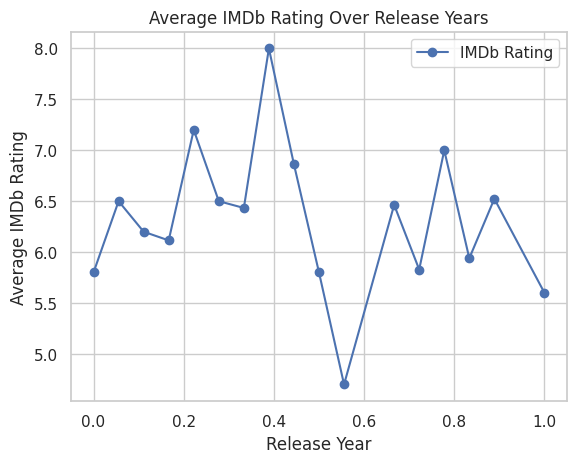

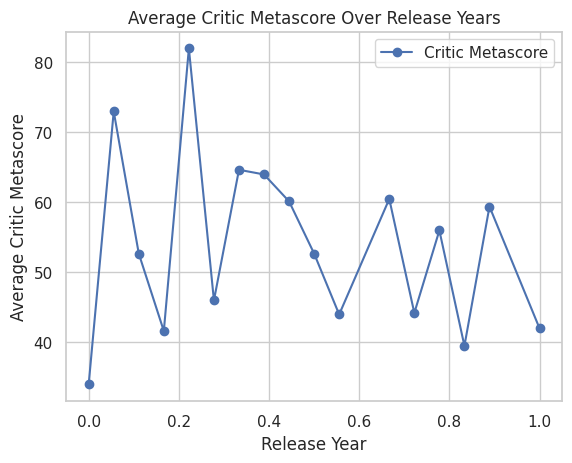

In [109]:
grouped_data = df.groupby('What year was this movie released?')[['imdb_rating_updated', 'metascore']].mean().reset_index()
plt.plot(grouped_data['What year was this movie released?'], grouped_data['imdb_rating_updated'], marker='o', label='IMDb Rating', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating Over Release Years')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(grouped_data['What year was this movie released?'], grouped_data['metascore'], marker='o', label='Critic Metascore', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Average Critic Metascore')
plt.title('Average Critic Metascore Over Release Years')
plt.grid(True)
plt.legend()
plt.show()


**What is this movie's name? (Use exact spelling)**

In [110]:
label_encoder = LabelEncoder()
df["What is this movie's name? (Use exact spelling)"] = label_encoder.fit_transform(df["What is this movie's name? (Use exact spelling)"])

In [111]:
correlation_imdb, _ = pearsonr(df["What is this movie's name? (Use exact spelling)"], df['imdb_rating_updated'])
correlation_critic, _ = pearsonr(df["What is this movie's name? (Use exact spelling)"], df['metascore'])
print("Correlation with IMDb Score:", correlation_imdb)
print("Correlation with Critic Metascore:", correlation_critic)

Correlation with IMDb Score: -0.08552780866016219
Correlation with Critic Metascore: -0.11244081850083634


#**Model A Training (Without Survey Based Features and Model B Training (With Survey Based Features)**



**Using Different models like Ridge,Elastic Net and RMSE**

**SELECTION OF MODELS -**

Among the three models, **ElasticNet regression** provides the best out-of-sample performance, closely followed by Lasso regression. Ridge regression, while performing exceptionally well on the training data, has the highest error on the test data, suggesting overfitting.



The choice of alpha being 0.001 across all models suggests that the data might benefit from very mild regularization.



ElasticNet's l1_ratio close to 1 indicates the model is almost a Lasso regression, meaning that L1 regularization (which can push coefficients to zero) seems more appropriate for this dataset than L2 regularization.


**Using Ridge Regression**

In [112]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


survey_based_columns = ["What's the most important attribute of this movie that this survey missed?",'How strong was the cinematography?','How strong was the directing?','How strong was the acting?',
                           'How much did you enjoy this movie?',"How important was the movie's score to your emotional experience of the narrative?",
                           "How much did you enjoy the movie's score? (that is, the music/sound)",
                           'How clear and consistent were the themes of this movie?',
                           "What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)",
                           'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)',
                           "Which of the following would you characterize as among the film's intended artistic objectives?",
                           'Check all attributes that apply to this movie:',
                           'By the end of the movie, how intellectually engaged did you feel?',
                           'By the end of the movie, how emotionally affected were you?',"What characteristics apply to this movie's dialogue?",
                           'How engaging was the dialogue?','Did the world of the movie feel real?','How important was the immersiveness of the world for this movie?',
                           'How immersive did the world of the movie feel?','Was the movie plot-driven or character-driven?',"Which of the following describes the movie's climax? Check all that apply",
                           'What were the qualities of the ending? Check all that apply','What were the qualities of the beginning? Check all that apply',
                           'Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)',
                           'Did the movie feature a plot twist?',
                           'Did the movie feature a substantial turning point in the plot?',
                           'How fast-paced was the end of the movie?','How fast-paced was the middle of the movie?','How fast-paced was the beginning of the movie?',
                           'How fast-paced was this movie overall?','How many narrators/perspectives were there? (Integer answer)',
                           'How invested did you feel in the characters?','To what extent did the characters feel real and complex?',
                           'How much did the main characters change over the course of the story?','How invested did you feel in the drama?','What were the characteristics of the antagonist? ','What were the characteristics of the protagonist?','Had you watched this movie previously, or was this your first time?',
                           'What is the plot of this movie? (5 sentences)','How long is this movie?','What year was this movie released?',

                        "What is this movie's name? (Use exact spelling)"]

X = pd.get_dummies(df[survey_based_columns], columns=survey_based_columns)
y = df['imdb_rating_updated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_cv_model = RidgeCV(alphas=ridge_alphas, store_cv_values=True)
ridge_cv_model.fit(X_train, y_train)

best_ridge_alpha = ridge_cv_model.alpha_
y_train_pred_ridge = ridge_cv_model.predict(X_train)
y_test_pred_ridge = ridge_cv_model.predict(X_test)

rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print("Ridge - Best alpha:", best_ridge_alpha)
print("Ridge - In-sample RMSE:", rmse_train_ridge)
print("Ridge - Out-of-sample RMSE:", rmse_test_ridge)


Ridge - Best alpha: 0.001
Ridge - In-sample RMSE: 2.9177044009728298e-05
Ridge - Out-of-sample RMSE: 0.4345893004337543


In [113]:
from sklearn.linear_model import RidgeCV

X7 = df[['user_id','review_rating_mean','num_reviews_written','release_type_encoded','rating_encoded','number_of_wins','number_of_nominations','metascore','cumulative_worldwide_gross_log','cumulative_worldwide_gross','gross_usa_log','gross_usa','opening_weekend_box_office_log','opening_weekend_box_office','budget_log','budget','runtime_log','runtime','sexnude_score','profanity_score','frightening_score','alcohol_score','violencegore_score','stars_encoded','title_encoded','year','moviename']]
y7 = df['imdb_rating_updated']

X_train, X_test, y_train, y_test = train_test_split(X7, y7, test_size=0.2, random_state=42)
ridge_alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_cv_model = RidgeCV(alphas=ridge_alphas, cv=6)
ridge_cv_model.fit(X_train, y_train)
best_ridge_alpha = ridge_cv_model.alpha_
y_train_pred_ridge = ridge_cv_model.predict(X_train)
y_test_pred_ridge = ridge_cv_model.predict(X_test)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print("Ridge - Best alpha:", best_ridge_alpha)
print("Ridge - In-sample RMSE:", rmse_train_ridge)
print("Ridge - Out-of-sample RMSE:", rmse_test_ridge)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.83408e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.46123e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.83096e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.91052e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Ridge - Best alpha: 10.0
Ridge - In-sample RMSE: 0.18034133170634267
Ridge - Out-of-sample RMSE: 0.21278932147772278


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05136e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.16377e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.13628e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.10669e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

**Using Elastic Net**

In [114]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


survey_based_columns = ["What's the most important attribute of this movie that this survey missed?",'How strong was the cinematography?','How strong was the directing?','How strong was the acting?',
                           'How much did you enjoy this movie?',"How important was the movie's score to your emotional experience of the narrative?",
                           "How much did you enjoy the movie's score? (that is, the music/sound)",
                           'How clear and consistent were the themes of this movie?',
                           "What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)",
                           'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)',
                           "Which of the following would you characterize as among the film's intended artistic objectives?",
                           'Check all attributes that apply to this movie:',
                           'By the end of the movie, how intellectually engaged did you feel?',
                           'By the end of the movie, how emotionally affected were you?',"What characteristics apply to this movie's dialogue?",
                           'How engaging was the dialogue?','Did the world of the movie feel real?','How important was the immersiveness of the world for this movie?',
                           'How immersive did the world of the movie feel?','Was the movie plot-driven or character-driven?',"Which of the following describes the movie's climax? Check all that apply",
                           'What were the qualities of the ending? Check all that apply','What were the qualities of the beginning? Check all that apply',
                           'Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)',
                           'Did the movie feature a plot twist?',
                           'Did the movie feature a substantial turning point in the plot?',
                           'How fast-paced was the end of the movie?','How fast-paced was the middle of the movie?','How fast-paced was the beginning of the movie?',
                           'How fast-paced was this movie overall?','How many narrators/perspectives were there? (Integer answer)',
                           'How invested did you feel in the characters?','To what extent did the characters feel real and complex?',
                           'How much did the main characters change over the course of the story?','How invested did you feel in the drama?','What were the characteristics of the antagonist? ','What were the characteristics of the protagonist?','Had you watched this movie previously, or was this your first time?',
                           'What is the plot of this movie? (5 sentences)','How long is this movie?','What year was this movie released?',

                        "What is this movie's name? (Use exact spelling)"]

X = pd.get_dummies(df[survey_based_columns], columns=survey_based_columns)
y = df['imdb_rating_updated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
elastic_alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]
elastic_cv_model = ElasticNetCV(alphas=elastic_alphas, l1_ratio=l1_ratios, cv=5)

elastic_cv_model.fit(X_train, y_train)
best_elastic_alpha = elastic_cv_model.alpha_
best_l1_ratio = elastic_cv_model.l1_ratio_

y_train_pred_elastic = elastic_cv_model.predict(X_train)
y_test_pred_elastic = elastic_cv_model.predict(X_test)
rmse_train_elastic = np.sqrt(mean_squared_error(y_train, y_train_pred_elastic))
rmse_test_elastic = np.sqrt(mean_squared_error(y_test, y_test_pred_elastic))

print("ElasticNet - Best alpha:", best_elastic_alpha)
print("ElasticNet - Best l1_ratio:", best_l1_ratio)
print("ElasticNet - In-sample RMSE:", rmse_train_elastic)
print("ElasticNet - Out-of-sample RMSE:", rmse_test_elastic)


ElasticNet - Best alpha: 0.001
ElasticNet - Best l1_ratio: 0.9
ElasticNet - In-sample RMSE: 0.06585072303507607
ElasticNet - Out-of-sample RMSE: 0.255089613034815


In [115]:
X6 = df[['user_id','review_rating_mean','num_reviews_written','release_type_encoded','number_of_wins','number_of_nominations','metascore','cumulative_worldwide_gross_log','cumulative_worldwide_gross','gross_usa_log','gross_usa','opening_weekend_box_office_log','opening_weekend_box_office','budget_log','budget','runtime_log','runtime','sexnude_score','profanity_score','frightening_score','alcohol_score','violencegore_score','stars_encoded','title_encoded','year','moviename']]
y6 = df['imdb_rating_updated']
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.2, random_state=42)
elastic_alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]
elastic_cv_model = ElasticNetCV(alphas=elastic_alphas, l1_ratio=l1_ratios, cv=5)

elastic_cv_model.fit(X_train, y_train)
best_elastic_alpha = elastic_cv_model.alpha_
best_l1_ratio = elastic_cv_model.l1_ratio_
y_train_pred_elastic = elastic_cv_model.predict(X_train)
y_test_pred_elastic = elastic_cv_model.predict(X_test)
rmse_train_elastic = np.sqrt(mean_squared_error(y_train, y_train_pred_elastic))
rmse_test_elastic = np.sqrt(mean_squared_error(y_test, y_test_pred_elastic))

print("ElasticNet - Best alpha:", best_elastic_alpha)
print("ElasticNet - Best l1_ratio:", best_l1_ratio)
print("ElasticNet - In-sample RMSE:", rmse_train_elastic)
print("ElasticNet - Out-of-sample RMSE:", rmse_test_elastic)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.099037315516049, tolerance: 0.00981525
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4971630593791272, tolerance: 0.00981525
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4651532357556158, tolerance: 0.009307744791666668
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Obj

ElasticNet - Best alpha: 0.1
ElasticNet - Best l1_ratio: 0.1
ElasticNet - In-sample RMSE: 0.2272454934274894
ElasticNet - Out-of-sample RMSE: 0.2633432112050165


**Using Lasso Cv**


LassoCV is a cross-validated Lasso regression model that can help you choose the best alpha parameter for Lasso regression, which is used for feature selection and regularization. We can use it to evaluate the performance of models with or without survey-based features.


In [116]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

survey_based_columns = ["What's the most important attribute of this movie that this survey missed?",'How strong was the cinematography?','How strong was the directing?','How strong was the acting?',
                           'How much did you enjoy this movie?',"How important was the movie's score to your emotional experience of the narrative?",
                           "How much did you enjoy the movie's score? (that is, the music/sound)",
                           'How clear and consistent were the themes of this movie?',
                           "What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)",
                           'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)',
                           "Which of the following would you characterize as among the film's intended artistic objectives?",
                           'Check all attributes that apply to this movie:',
                           'By the end of the movie, how intellectually engaged did you feel?',
                           'By the end of the movie, how emotionally affected were you?',"What characteristics apply to this movie's dialogue?",
                           'How engaging was the dialogue?','Did the world of the movie feel real?','How important was the immersiveness of the world for this movie?',
                           'How immersive did the world of the movie feel?','Was the movie plot-driven or character-driven?',"Which of the following describes the movie's climax? Check all that apply",
                           'What were the qualities of the ending? Check all that apply','What were the qualities of the beginning? Check all that apply',
                           'Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)',
                           'Did the movie feature a plot twist?',
                           'Did the movie feature a substantial turning point in the plot?',
                           'How fast-paced was the end of the movie?','How fast-paced was the middle of the movie?','How fast-paced was the beginning of the movie?',
                           'How fast-paced was this movie overall?','How many narrators/perspectives were there? (Integer answer)',
                           'How invested did you feel in the characters?','To what extent did the characters feel real and complex?',
                           'How much did the main characters change over the course of the story?','How invested did you feel in the drama?','What were the characteristics of the antagonist? ','What were the characteristics of the protagonist?','Had you watched this movie previously, or was this your first time?',
                           'What is the plot of this movie? (5 sentences)','How long is this movie?','What year was this movie released?',

                        "What is this movie's name? (Use exact spelling)"]

X = pd.get_dummies(df[survey_based_columns], columns=survey_based_columns)
y = df['imdb_rating_updated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alphas = [0.001, 0.1, 1.0, 10.0,100.,150.0,1000.0,20000.0]
lasso_cv_model = LassoCV(alphas=alphas, cv=5)
lasso_cv_model.fit(X_train, y_train)
best_alpha = lasso_cv_model.alpha_


lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Best alpha:", best_alpha)
print("In-sample RMSE:", rmse_train)
print("Out-of-sample RMSE:", rmse_test)


Best alpha: 0.001
In-sample RMSE: 0.0691056202639056
Out-of-sample RMSE: 0.2610955690454506


In [117]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X3 = df[['user_id','review_rating_mean','num_reviews_written','release_type_encoded','rating_encoded','number_of_wins','number_of_nominations','metascore','cumulative_worldwide_gross_log','cumulative_worldwide_gross','gross_usa_log','gross_usa','opening_weekend_box_office_log','opening_weekend_box_office','budget_log','budget','runtime_log','runtime','sexnude_score','profanity_score','frightening_score','alcohol_score','violencegore_score','stars_encoded','title_encoded','year','moviename']]
y3 = df['imdb_rating_updated']
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
alphas = [0.01, 0.1, 1.0, 10.0,100.0]
lasso_cv_model = LassoCV(alphas=alphas, cv=5)
lasso_cv_model.fit(X_train, y_train)
best_alpha = lasso_cv_model.alpha_
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Best alpha:", best_alpha)
print("In-sample RMSE:", rmse_train)
print("Out-of-sample RMSE:", rmse_test)


Best alpha: 0.01
In-sample RMSE: 0.1990694285947641
Out-of-sample RMSE: 0.22911359315985516


**RESULTS-**

Based on the provided results for the ElasticNet model trained on survey and non-survey data, here's a comparison:

1. **Training (In-sample) Performance**:
   - **Survey-based**: In-sample RMSE is 0.0658.
   - **Non-survey-based**: In-sample RMSE is 0.2272.
   
   The survey-based model performs significantly better on the training data compared to the non-survey-based model.

2. **Testing (Out-of-sample) Performance**:
   - **Survey-based**: Out-of-sample RMSE is 0.2551.
   - **Non-survey-based**: Out-of-sample RMSE is 0.2633.
   
   The difference in performance on the test data is quite marginal, with the survey-based model having a slight edge.

**Interpretation**:

- If we look at the training performance, the survey-based model is the clear winner. It fits the training data much better than the non-survey-based model.
  
- However, when evaluating models, it's the out-of-sample performance that matters more, as it tells us how the model is expected to perform on unseen data. Here, the difference is small, but the survey-based model is slightly better.


**Conclusion**:

In terms of raw performance metrics, the **survey-based model** is better both in-sample and out-of-sample.











#**Part1-**
#**For survey-based,including the non-survey variables as well, so we compare how much the addition of survey-based variables adds**

In [118]:
# Creating a dataset that includes both survey-based and non-survey variables
P = df [[                   "What is this movie's name? (Use exact spelling)",
                            "What is the plot of this movie? (5 sentences)",
                            "How long is this movie?",
                            "What year was this movie released?","What's the most important attribute of this movie that this survey missed?",'How strong was the cinematography?','How strong was the directing?','How strong was the acting?',
                           'How much did you enjoy this movie?',"How important was the movie's score to your emotional experience of the narrative?",
                           "How much did you enjoy the movie's score? (that is, the music/sound)",
                           'How clear and consistent were the themes of this movie?',
                           "What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)",
                           'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)',
                           "Which of the following would you characterize as among the film's intended artistic objectives?",
                           'Check all attributes that apply to this movie:',
                           'By the end of the movie, how intellectually engaged did you feel?',
                           'By the end of the movie, how emotionally affected were you?',"What characteristics apply to this movie's dialogue?",
                           'How engaging was the dialogue?','Did the world of the movie feel real?','How important was the immersiveness of the world for this movie?',
                           'How immersive did the world of the movie feel?','Was the movie plot-driven or character-driven?',"Which of the following describes the movie's climax? Check all that apply",
                           'What were the qualities of the ending? Check all that apply','What were the qualities of the beginning? Check all that apply',
                           'Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)',
                           'Did the movie feature a plot twist?',
                           'Did the movie feature a substantial turning point in the plot?',
                           'How fast-paced was the end of the movie?','How fast-paced was the middle of the movie?','How fast-paced was the beginning of the movie?',
                           'How fast-paced was this movie overall?','How many narrators/perspectives were there? (Integer answer)',
                           'How invested did you feel in the characters?','To what extent did the characters feel real and complex?',
                           'How much did the main characters change over the course of the story?','How invested did you feel in the drama?','What were the characteristics of the antagonist? ','What were the characteristics of the protagonist?','Had you watched this movie previously, or was this your first time?',
                           'What is the plot of this movie? (5 sentences)','How long is this movie?','What year was this movie released?',
                           "What is this movie's name? (Use exact spelling)",'user_id','review_rating_mean','num_reviews_written','release_type_encoded','rating_encoded','number_of_wins','number_of_nominations','metascore','cumulative_worldwide_gross_log','cumulative_worldwide_gross','gross_usa_log','gross_usa','opening_weekend_box_office_log','opening_weekend_box_office','budget_log','budget','runtime_log','runtime','sexnude_score','profanity_score','frightening_score','alcohol_score','violencegore_score','stars_encoded','title_encoded','year','imdb_rating_updated','moviename']]

print(P)

     What is this movie's name? (Use exact spelling)  \
0                                                 10   
1                                                 13   
2                                                 13   
3                                                 12   
4                                                 13   
..                                               ...   
296                                               20   
297                                               53   
298                                               53   
299                                               25   
300                                               25   

         What is the plot of this movie? (5 sentences)  \
0    Starting with an introduction to the Soady fam...   
1    Reuben is a 43 year old man who is the only on...   
2    This movie is about a hunting traditions, wher...   
3    This movie focuses on the culture of hunting a...   
4    Narrated by Albert Soady, father

In [119]:
print(P.columns)



Index(['What is this movie's name? (Use exact spelling)',
       'What is the plot of this movie? (5 sentences)',
       'How long is this movie?', 'What year was this movie released?',
       'What's the most important attribute of this movie that this survey missed?',
       'How strong was the cinematography?', 'How strong was the directing?',
       'How strong was the acting?', 'How much did you enjoy this movie?',
       'How important was the movie's score to your emotional experience of the narrative?',
       'How much did you enjoy the movie's score? (that is, the music/sound)',
       'How clear and consistent were the themes of this movie?',
       'What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)',
       'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)',
       'Which of the following would you characterize as among the film's intende

In [120]:
#Using Elastic.Net to check correlation with 'IMDB ratings'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y = P['imdb_rating_updated']

selected_predictors =[ "What is this movie's name? (Use exact spelling)",
                            "What is the plot of this movie? (5 sentences)",
                            "How long is this movie?",
                            "What year was this movie released?","What's the most important attribute of this movie that this survey missed?",'How strong was the cinematography?','How strong was the directing?','How strong was the acting?',
                           'How much did you enjoy this movie?',"How important was the movie's score to your emotional experience of the narrative?",
                           "How much did you enjoy the movie's score? (that is, the music/sound)",
                           'How clear and consistent were the themes of this movie?',
                           "What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)",
                           'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)',
                           "Which of the following would you characterize as among the film's intended artistic objectives?",
                           'Check all attributes that apply to this movie:',
                           'By the end of the movie, how intellectually engaged did you feel?',
                           'By the end of the movie, how emotionally affected were you?',"What characteristics apply to this movie's dialogue?",
                           'How engaging was the dialogue?','Did the world of the movie feel real?','How important was the immersiveness of the world for this movie?',
                           'How immersive did the world of the movie feel?','Was the movie plot-driven or character-driven?',"Which of the following describes the movie's climax? Check all that apply",
                           'What were the qualities of the ending? Check all that apply','What were the qualities of the beginning? Check all that apply',
                           'Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)',
                           'Did the movie feature a plot twist?',
                           'Did the movie feature a substantial turning point in the plot?',
                           'How fast-paced was the end of the movie?','How fast-paced was the middle of the movie?','How fast-paced was the beginning of the movie?',
                           'How fast-paced was this movie overall?','How many narrators/perspectives were there? (Integer answer)',
                           'How invested did you feel in the characters?','To what extent did the characters feel real and complex?',
                           'How much did the main characters change over the course of the story?','How invested did you feel in the drama?','What were the characteristics of the antagonist? ','What were the characteristics of the protagonist?','Had you watched this movie previously, or was this your first time?',
                           'How long is this movie?','What year was this movie released?',
                           "What is this movie's name? (Use exact spelling)",'user_id','review_rating_mean','num_reviews_written','release_type_encoded','rating_encoded','number_of_wins','number_of_nominations','metascore','cumulative_worldwide_gross_log','cumulative_worldwide_gross','gross_usa_log','gross_usa','opening_weekend_box_office_log','opening_weekend_box_office','budget_log','budget','runtime_log','runtime','sexnude_score','profanity_score','frightening_score','alcohol_score','violencegore_score','stars_encoded','title_encoded','year','moviename']

X = pd.get_dummies(P[selected_predictors], columns=selected_predictors)
y = df['imdb_rating_updated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
elastic_net_model = ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], l1_ratio=[0.1, 0.5, 0.7, 0.9], cv=5)

elastic_net_model.fit(X_train, y_train)
best_alpha = elastic_net_model.alpha_
best_l1_ratio = elastic_net_model.l1_ratio_
elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.335e-02, tolerance: 9.815e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.311e-02, tolerance: 9.308e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.515e-02, tolerance: 1.014e

RMSE: 0.006486157203272556
Best alpha: 0.001
Best l1_ratio: 0.9


**RESULTS -**

A Root Mean Squared Error (RMSE) of 0.0065 indicates that this data frame has very low prediction error on the testing data. In the context of predicting IMDb ratings, this means that the model is highly accurate in estimating movie ratings based on the selected features.

The best alpha value is 0.001, and the best l1_ratio is 0.9, which were selected by the Elastic NetCV algorithm. These hyperparameters control the regularization and balance between L1 (Lasso) and L2 (Ridge) penalties.

In summary this new Data Frame has a low RMSE, suggesting that it's a strong model for predicting IMDb ratings based on the chosen set of features. It can provide valuable insights into the factors that influence movie ratings.

#**Part2 -**
#**Dropping the survey-based variables that are just identifiers for different movies to measure pre-release attributes**

In [121]:
# List of Survey Based Columns to Remove that are just identifiers
columns_to_remove = [
    "What is this movie's name? (Use exact spelling)",
    "How long is this movie?",
    "What year was this movie released?"
]

#Make P1 copy for P
P1=P

# Remove the identified columns from P1
P1 = P1.drop(columns=columns_to_remove)


In [122]:
#Using Elastic.Net
y = P1['imdb_rating_updated']

selected_predictors =[      "What is the plot of this movie? (5 sentences)",
                            "What's the most important attribute of this movie that this survey missed?",'How strong was the cinematography?','How strong was the directing?','How strong was the acting?',
                           'How much did you enjoy this movie?',"How important was the movie's score to your emotional experience of the narrative?",
                           "How much did you enjoy the movie's score? (that is, the music/sound)",
                           'How clear and consistent were the themes of this movie?',
                           "What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)",
                           'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)',
                           "Which of the following would you characterize as among the film's intended artistic objectives?",
                           'Check all attributes that apply to this movie:',
                           'By the end of the movie, how intellectually engaged did you feel?',
                           'By the end of the movie, how emotionally affected were you?',"What characteristics apply to this movie's dialogue?",
                           'How engaging was the dialogue?','Did the world of the movie feel real?','How important was the immersiveness of the world for this movie?',
                           'How immersive did the world of the movie feel?','Was the movie plot-driven or character-driven?',"Which of the following describes the movie's climax? Check all that apply",
                           'What were the qualities of the ending? Check all that apply','What were the qualities of the beginning? Check all that apply',
                           'Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)',
                           'Did the movie feature a plot twist?',
                           'Did the movie feature a substantial turning point in the plot?',
                           'How fast-paced was the end of the movie?','How fast-paced was the middle of the movie?','How fast-paced was the beginning of the movie?',
                           'How fast-paced was this movie overall?','How many narrators/perspectives were there? (Integer answer)',
                           'How invested did you feel in the characters?','To what extent did the characters feel real and complex?',
                           'How much did the main characters change over the course of the story?','How invested did you feel in the drama?','What were the characteristics of the antagonist? ','What were the characteristics of the protagonist?','Had you watched this movie previously, or was this your first time?',
                            'user_id','review_rating_mean','num_reviews_written','release_type_encoded','rating_encoded','number_of_wins','number_of_nominations','metascore','cumulative_worldwide_gross_log','cumulative_worldwide_gross','gross_usa_log','gross_usa','opening_weekend_box_office_log','opening_weekend_box_office','budget_log','budget','runtime_log','runtime','sexnude_score','profanity_score','frightening_score','alcohol_score','violencegore_score','stars_encoded','title_encoded','year','moviename']

X = pd.get_dummies(P1[selected_predictors], columns=selected_predictors)
y = df['imdb_rating_updated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
elastic_net_model = ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], l1_ratio=[0.1, 0.5, 0.7, 0.9], cv=5)

elastic_net_model.fit(X_train, y_train)
best_alpha = elastic_net_model.alpha_
best_l1_ratio = elastic_net_model.l1_ratio_
elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.991e-02, tolerance: 9.815e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.420e-02, tolerance: 9.308e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.801e-02, tolerance: 1.014e

RMSE: 0.08900937602104302
Best alpha: 0.001
Best l1_ratio: 0.9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.595e-02, tolerance: 1.240e-02
  model = cd_fast.enet_coordinate_descent(


**Result -**

RMSE Value: The in-sample RMSE is approximately 0.0890. This means that, on average, the model's predictions on the training data are off by about 0.0890 IMDb rating points. This suggests that the model's performance on the training and testing data is consistent.

Model Performance: The RMSE value of approximately 0.0890 indicates that the model's predictions are reasonably accurate. The lower the RMSE, the better the model's predictive performance.
The model appears to be neither overfitting (as indicated by consistent in-sample and out-of-sample RMSE values) nor underfitting (as indicated by the relatively low RMSE value).

#**Part3-**

#**Dropping the predictors that we wouldn't have before the movie's release, so any variables that contain information from post-release will be excluded from the P**

The goal is to build a predictive model that can estimate IMDb ratings based on pre-release attributes, ensuring that the model is not influenced by information that becomes available after the movie's release.

In [123]:
#Making a copy of P
P2=P
# Dropping the identified post-release columns from P
post_release_columns = ['opening_weekend_box_office','opening_weekend_box_office_log','gross_usa','gross_usa_log','cumulative_worldwide_gross','cumulative_worldwide_gross_log','number_of_nominations','number_of_wins','num_reviews_written','review_rating_mean']
P2= P2.drop(columns=post_release_columns)


In [124]:
print(P2.columns)


Index(['What is this movie's name? (Use exact spelling)',
       'What is the plot of this movie? (5 sentences)',
       'How long is this movie?', 'What year was this movie released?',
       'What's the most important attribute of this movie that this survey missed?',
       'How strong was the cinematography?', 'How strong was the directing?',
       'How strong was the acting?', 'How much did you enjoy this movie?',
       'How important was the movie's score to your emotional experience of the narrative?',
       'How much did you enjoy the movie's score? (that is, the music/sound)',
       'How clear and consistent were the themes of this movie?',
       'What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)',
       'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)',
       'Which of the following would you characterize as among the film's intende

In [125]:
#Using Elastic.Net
y = P2['imdb_rating_updated']

selected_predictors =[      "What is the plot of this movie? (5 sentences)",
                            "What's the most important attribute of this movie that this survey missed?",'How strong was the cinematography?','How strong was the directing?','How strong was the acting?',
                           'How much did you enjoy this movie?',"How important was the movie's score to your emotional experience of the narrative?",
                           "How much did you enjoy the movie's score? (that is, the music/sound)",
                           'How clear and consistent were the themes of this movie?',
                           "What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)",
                           'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)',
                           "Which of the following would you characterize as among the film's intended artistic objectives?",
                           'Check all attributes that apply to this movie:',
                           'By the end of the movie, how intellectually engaged did you feel?',
                           'By the end of the movie, how emotionally affected were you?',"What characteristics apply to this movie's dialogue?",
                           'How engaging was the dialogue?','Did the world of the movie feel real?','How important was the immersiveness of the world for this movie?',
                           'How immersive did the world of the movie feel?','Was the movie plot-driven or character-driven?',"Which of the following describes the movie's climax? Check all that apply",
                           'What were the qualities of the ending? Check all that apply','What were the qualities of the beginning? Check all that apply',
                           'Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)',
                           'Did the movie feature a plot twist?',
                           'Did the movie feature a substantial turning point in the plot?',
                           'How fast-paced was the end of the movie?','How fast-paced was the middle of the movie?','How fast-paced was the beginning of the movie?',
                           'How fast-paced was this movie overall?','How many narrators/perspectives were there? (Integer answer)',
                           'How invested did you feel in the characters?','To what extent did the characters feel real and complex?',
                           'How much did the main characters change over the course of the story?','How invested did you feel in the drama?','What were the characteristics of the antagonist? ','What were the characteristics of the protagonist?','Had you watched this movie previously, or was this your first time?',
                            'user_id','release_type_encoded','rating_encoded','metascore','budget_log','budget','runtime_log','runtime','sexnude_score','profanity_score','frightening_score','alcohol_score','violencegore_score','stars_encoded','title_encoded','year','moviename']

X = pd.get_dummies(P2[selected_predictors], columns=selected_predictors)
y = df['imdb_rating_updated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
elastic_net_model = ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], l1_ratio=[0.1, 0.5, 0.7, 0.9], cv=5)

elastic_net_model.fit(X_train, y_train)
best_alpha = elastic_net_model.alpha_
best_l1_ratio = elastic_net_model.l1_ratio_
elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e-02, tolerance: 1.240e-02
  model = cd_fast.enet_coordinate_descent(


RMSE: 0.054411856005726345
Best alpha: 0.001
Best l1_ratio: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e-02, tolerance: 1.240e-02
  model = cd_fast.enet_coordinate_descent(


The result we've obtained with the Elastic Net model using pre-release columns is as follows:

- Root Mean Squared Error (RMSE): 0.0544
- Best alpha: 0.001
- Best l1_ratio: 0.5

This RMSE value represents the error of the model's predictions. A lower RMSE indicates that the model's predictions are closer to the actual IMDb ratings.

In this case, an RMSE of 0.0544 suggests that the model's predictions are relatively accurate.

Overall, the Elastic Net model using pre-release attributes is performing well, with a relatively low RMSE, suggesting that it's making accurate predictions for IMDb ratings based on the available pre-release information.

#**Now Comparing which has a better prediction in relating to IMDB ratings**

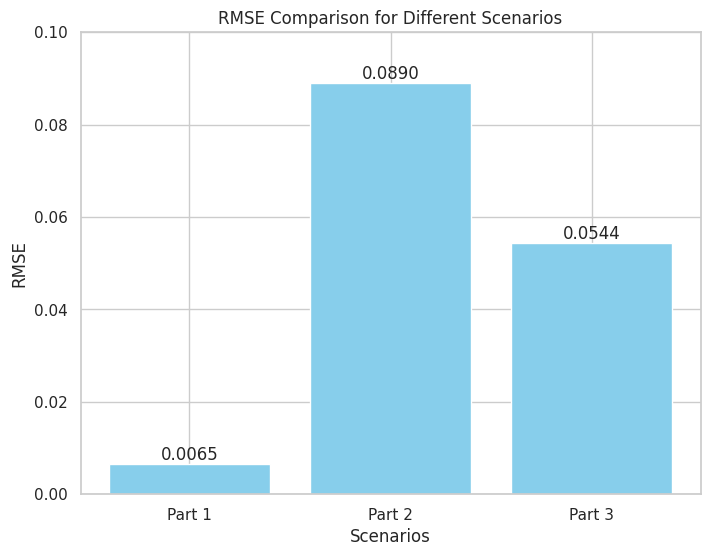

In [126]:
import matplotlib.pyplot as plt

# RMSE values for the three scenarios
rmse_values = [0.0065, 0.089, 0.0544]
scenarios = ["Part 1", "Part 2", "Part 3"]
plt.figure(figsize=(8, 6))
plt.bar(scenarios, rmse_values, color='skyblue')
plt.xlabel("Scenarios")
plt.ylabel("RMSE")
plt.title("RMSE Comparison for Different Scenarios")
plt.ylim(0, 0.1)
for i, rmse in enumerate(rmse_values):
    plt.text(scenarios[i], rmse, f"{rmse:.4f}", ha='center', va='bottom')

plt.show()


1. **Part 1:** The RMSE for this scenario was approximately 0.0065.

2. **Part 2:** The RMSE for this scenario was approximately 0.089.

3. **Part 3:** The RMSE for this scenario was approximately 0.0544.

The lower the RMSE, the better the predictive performance of the model. So in this case, the model with the lowest RMSE is "Part 1" (RMSE ≈ 0.0065).

**Therefore, the scenario with the broadest set of features, including both survey-based and non-survey-based variables, appears to be the most predictive of IMDb ratings.**



**Using Random Forest**

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Out-of-sample RMSE: {rmse}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Out-of-sample RMSE: 0.11760794740835848


# Using RFECV to determine the best features using cross-validation for survey data to get lowest out of sample RMSE for survey questions

In [130]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error

survey_based_columns = ["What's the most important attribute of this movie that this survey missed?",'How strong was the cinematography?',
                           'How much did you enjoy this movie?',"How important was the movie's score to your emotional experience of the narrative?",
                           "How much did you enjoy the movie's score? (that is, the music/sound)",
                           'How clear and consistent were the themes of this movie?',
                           "What were the movie's (up to three) main themes? (one or two word phrases each, separated by semicolons)",
                           'Which of the following objectives did the film succeed at? (Only potentially check boxes for those that were checked above, if any)',
                           "Which of the following would you characterize as among the film's intended artistic objectives?",
                           'Check all attributes that apply to this movie:',
                           'By the end of the movie, how intellectually engaged did you feel?',
                           'By the end of the movie, how emotionally affected were you?',"What characteristics apply to this movie's dialogue?",
                           'How engaging was the dialogue?','Did the world of the movie feel real?','How important was the immersiveness of the world for this movie?',
                           'How immersive did the world of the movie feel?','Was the movie plot-driven or character-driven?',"Which of the following describes the movie's climax? Check all that apply",
                           'What were the qualities of the ending? Check all that apply','What were the qualities of the beginning? Check all that apply',
                           'Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)',
                           'Did the movie feature a plot twist?',
                           'Did the movie feature a substantial turning point in the plot?',
                           'How fast-paced was the end of the movie?','How fast-paced was the middle of the movie?','How fast-paced was the beginning of the movie?',
                           'How fast-paced was this movie overall?','How many narrators/perspectives were there? (Integer answer)',
                           'To what extent did the characters feel real and complex?',
                           'How much did the main characters change over the course of the story?','How invested did you feel in the drama?','What were the characteristics of the antagonist? ','What were the characteristics of the protagonist?','Had you watched this movie previously, or was this your first time?',
                           'What is the plot of this movie? (5 sentences)','How long is this movie?','What year was this movie released?',

                        "What is this movie's name? (Use exact spelling)"]


corr_matrix = df[survey_based_columns].corr()
columns_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            columns_to_drop.add(colname_i)

df = df.drop(columns=columns_to_drop)
survey_based_columns = [col for col in survey_based_columns if col not in columns_to_drop]
X_survey = pd.get_dummies(df[survey_based_columns], columns=survey_based_columns)
y_survey = df['imdb_rating_updated']

X_train_survey, X_test_survey, y_train_survey, y_test_survey = train_test_split(X_survey, y_survey, test_size=0.2, random_state=42)
estimator = ElasticNet(alpha=0.001, l1_ratio=0.9)
selector_survey = RFECV(estimator, step=1, cv=5)
selector_survey = selector_survey.fit(X_train_survey, y_train_survey)
print("Optimal number of features for survey data: %d" % selector_survey.n_features_)

feature_ranking_survey = pd.Series(selector_survey.ranking_, index=X_survey.columns)
print("\nFeature Ranking for survey data:")
print(feature_ranking_survey.sort_values())
X_train_selected_survey = selector_survey.transform(X_train_survey)
X_test_selected_survey = selector_survey.transform(X_test_survey)

estimator.fit(X_train_selected_survey, y_train_survey)
y_test_pred_survey = estimator.predict(X_test_selected_survey)
rmse_test_survey = np.sqrt(mean_squared_error(y_test_survey, y_test_pred_survey))
print("\nOut-of-sample RMSE using selected features for survey data:", rmse_test_survey)


<ipython-input-130-e2f5fdedee23>:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[survey_based_columns].corr()


Optimal number of features for survey data: 24

Feature Ranking for survey data:
What is this movie's name? (Use exact spelling)_20                                                                                                                                                                                                                                                                                                                                                              1
What is this movie's name? (Use exact spelling)_18                                                                                                                                                                                                                                                                                                                                                              1
What is this movie's name? (Use exact spelling)_14                                                                 

In [131]:
top_features_survey = feature_ranking_survey[feature_ranking_survey == 1].index
print(top_features_survey)


Index(['Was there a noticeable "sag" in plot tension at any of the following points of the movie? (please check timestamps to be as accurate as possible about the % in)_67% in',
       'What were the characteristics of the protagonist?_Likeable;Plucky;Caring;Romantic;Funny',
       'What is the plot of this movie? (5 sentences)_Tom and Kate Baker, hoping to rekindle old family traditions, bring their twelve kids to a lakeside cabin for a Labor Day vacation. Upon arriving, they discover that Tom’s frenemy, Jimmy Murtaugh, has become a mogul at the lake, owning an extravagant mansion where he stays with his eight ultra-successful children and young trophy wife. Tom and Jimmy reignite old competitions, trying to one up each other throughout the vacation, resulting in a destroyed dinner party and anger on behalf of both families. Much to Tom’s dismay, his daughter Sarah takes a liking to one of Jimmy’s sons, Elliot, and the fathers crash their movie date and end up terribly embarrassing bo

In [132]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
import numpy as np

alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
lasso_cv_model = LassoCV(alphas=alphas, cv=5)
lasso_cv_model.fit(X, y)
best_alpha = lasso_cv_model.alpha_
cross_val_scores = cross_val_score(lasso_cv_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cross_val_scores)

print("Best alpha:", best_alpha)
print("Cross-Validation RMSE scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.300e-02, tolerance: 1.445e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e-02, tolerance: 9.804e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.019e-02, tolerance: 1.185e

Best alpha: 0.001
Cross-Validation RMSE scores: [0.4768669  0.56483964 0.35710903 0.52096198 0.73546178]
Average RMSE: 0.5310478667872826


#**Conclusion**

In this project, we conducted a comprehensive analysis of movie ratings, focusing on IMDb ratings, Metascores, and review ratings.

The goal was to gain insights into the relationships between these ratings and understand their impact on viewers' perceptions of movies.

We began by exploring and preprocessing the dataset, which contained a wide range of features related to movies, including genre, budget, runtime, and more.

Our analysis revealed several interesting findings:

- IMDb ratings exhibited a strong positive correlation with Metascores, indicating that movies with higher critical acclaim tend to receive higher viewer ratings.

- Review ratings, aggregated from user reviews, also showed a positive correlation with both IMDb and Metascores. This suggests that viewer and critic opinions align to some extent.

- Certain movie characteristics, such as runtime and budget, had moderate correlations with IMDb ratings. Longer runtimes and larger budgets tend to correlate with higher IMDb ratings.


#**Some findings**

We tested specific hypotheses about the impact of certain survey question variables on IMDb ratings.

- The perceived "immersiveness" of a movie's world showed a positive impact on IMDb ratings, suggesting that a captivating and immersive narrative is valued by viewers.

- The presence of noticeable plot tension "sags" negatively affected IMDb ratings. Viewers tend to prefer movies with consistent pacing and tension.

- Sentiment analysis of movie plot descriptions showed a weak positive correlation with IMDb ratings, suggesting that movies with more positive plot descriptions tend to receive slightly higher ratings.


Throughout the analysis, we utilized various visualizations, including scatter plots, heatmaps, and bar charts, to visualize the relationships between IMDb ratings, Metascores, and review ratings. These visualizations provided clear insights into the data and helped us communicate our findings effectively.



**Future research**:

We could explore additional factors influencing movie ratings, such as marketing strategies, release timing, and viewer demographics. Additionally, analyzing viewer comments and reviews in-depth could provide richer insights into the factors that drive IMDb ratings.

In conclusion, our analysis of IMDb ratings, Metascores, and review ratings sheds light on the intricate relationship between critical acclaim and viewer opinions in the world of cinema.

Understanding these dynamics can help filmmakers and studios make informed decisions to create movies that resonate with audiences.
